In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:

%matplotlib inline

In [3]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [4]:
series = pd.read_csv('train/subj9_series1_data.csv', index_col=0)
print(series.head())

                 Fp1  Fp2    F7    F3   Fz   F4  F8  FC5  FC1  FC2  ...    P7  \
id                                                                  ...         
subj9_series1_0 -745  552 -1261 -1499  -89  325  50 -155 -265 -343  ...   359   
subj9_series1_1 -796  585 -1295 -1498  -95  308  30 -159 -272 -348  ...   339   
subj9_series1_2 -749  602 -1243 -1501 -101  295  24 -156 -274 -353  ...   361   
subj9_series1_3 -698  617 -1225 -1527  -73  320  27 -148 -281 -338  ...   375   
subj9_series1_4 -714  579 -1245 -1575 -115  303  14 -178 -297 -372  ...   343   

                 P3   Pz  P4    P8  PO9   O1   Oz   O2  PO10  
id                                                            
subj9_series1_0  27  130  35 -1139   26  233 -128   89   -46  
subj9_series1_1  29  122  32 -1181   69  241  -92  169    -2  
subj9_series1_2  29  115  38 -1160   59  253  -60  186    92  
subj9_series1_3  41  147  56 -1113   94  277  -23  224    71  
subj9_series1_4  13  115  51 -1073   97  274  -15  260

In [5]:
events = pd.read_csv('train/subj9_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj9_series1_0          0                0                   0        0   
subj9_series1_1          0                0                   0        0   
subj9_series1_2          0                0                   0        0   
subj9_series1_3          0                0                   0        0   
subj9_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj9_series1_0        0             0  
subj9_series1_1        0             0  
subj9_series1_2        0             0  
subj9_series1_3        0             0  
subj9_series1_4        0             0  


In [6]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 5991
Number of rows where three events are happen simultaneously: 278
Number of rows where four events are happen simultaneously: 0


In [7]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

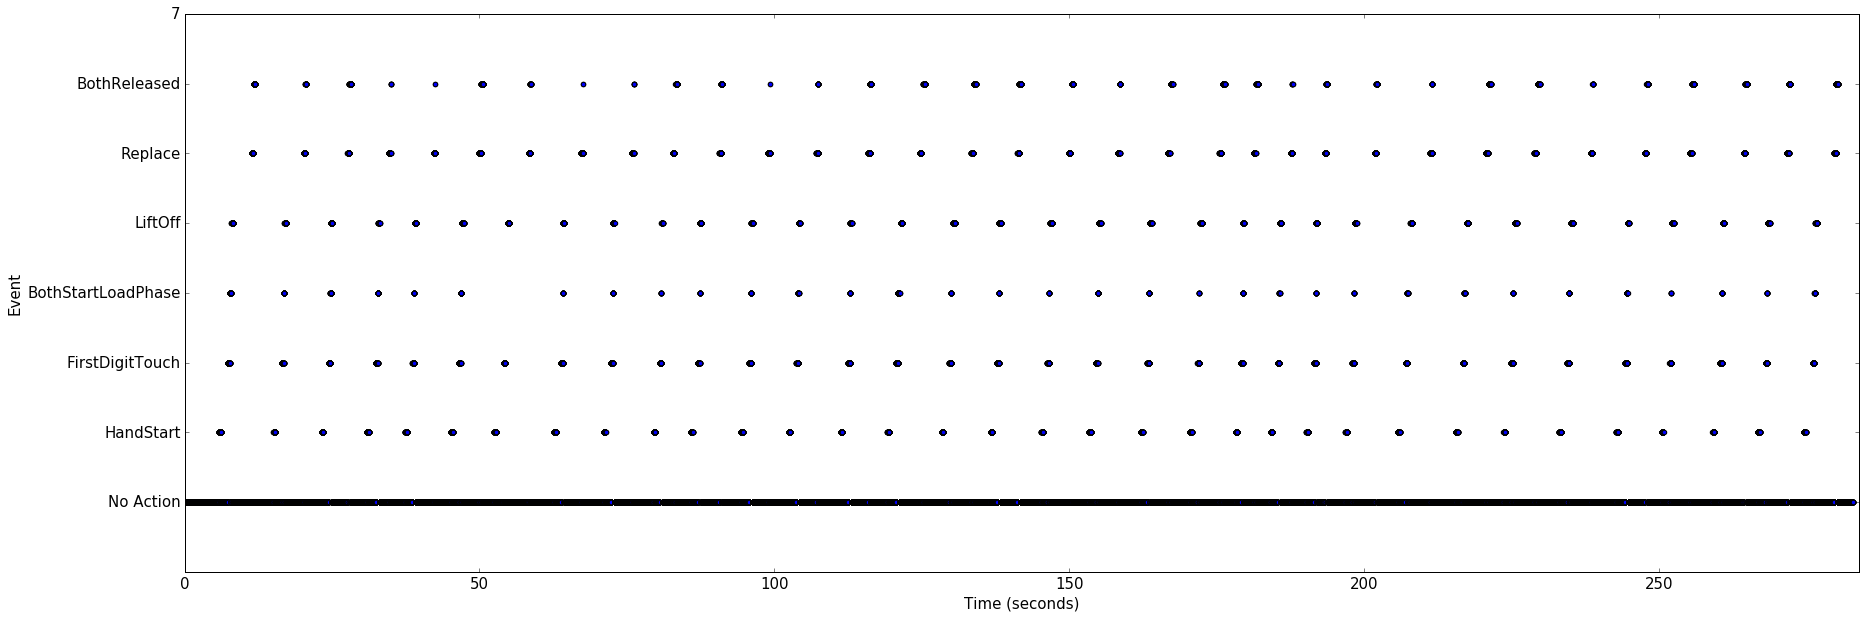

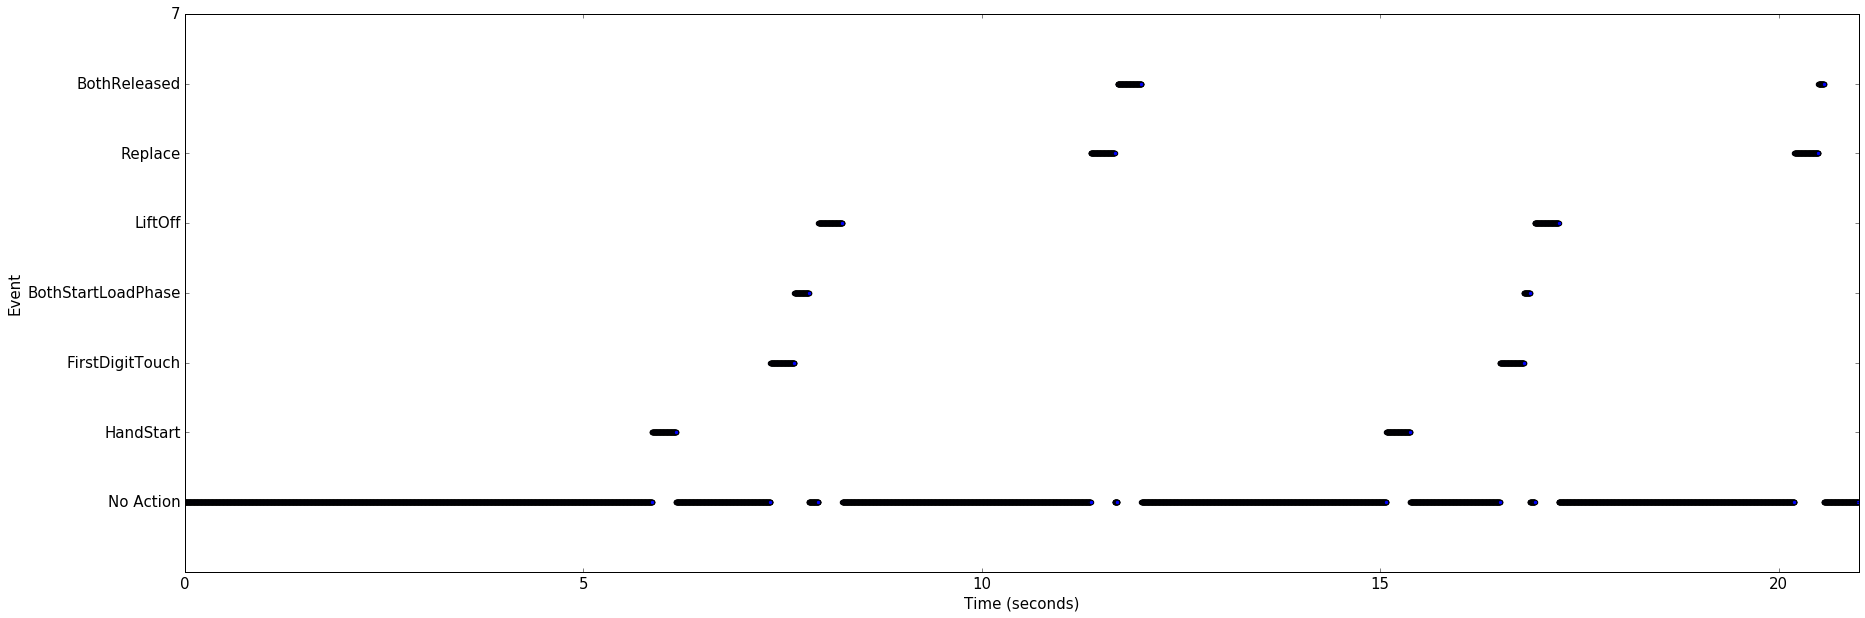

In [8]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


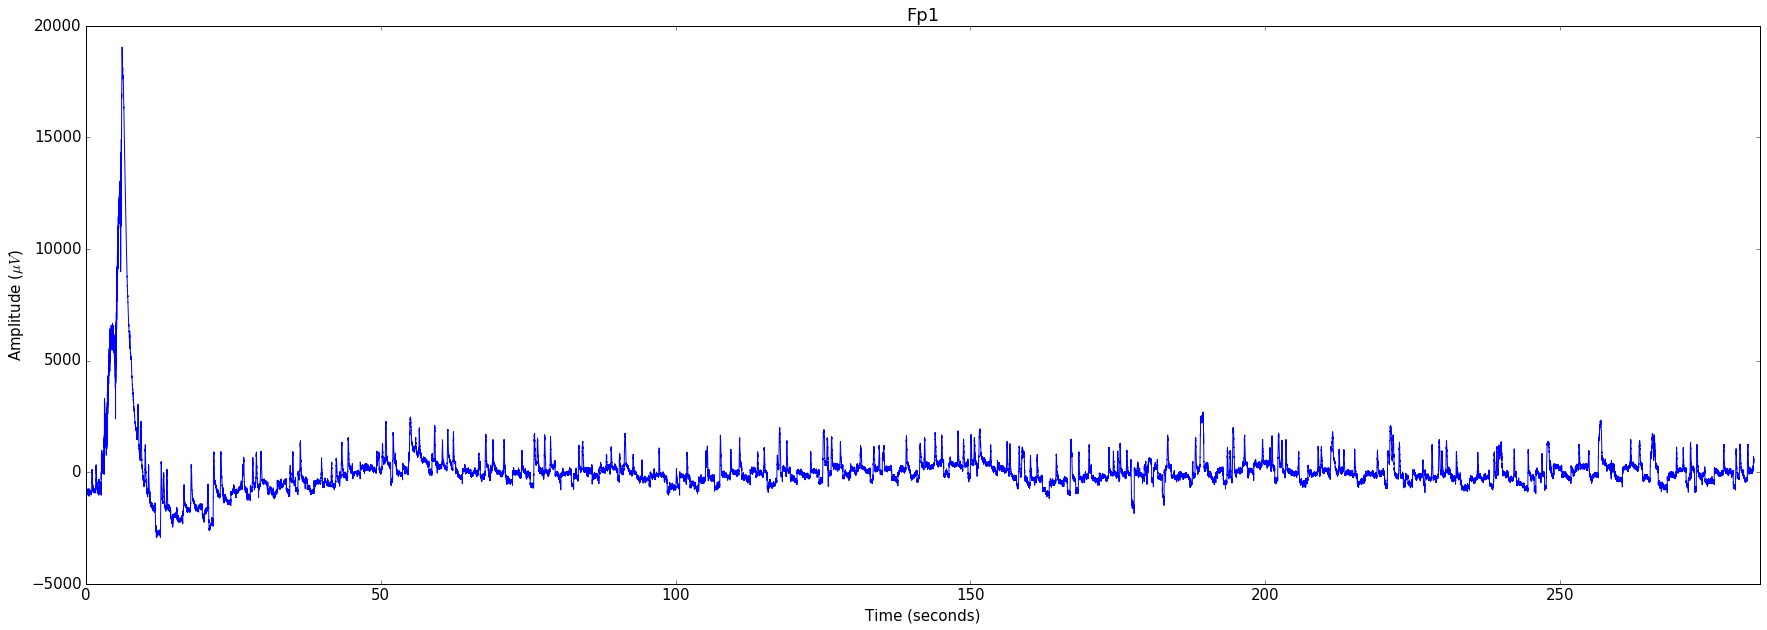

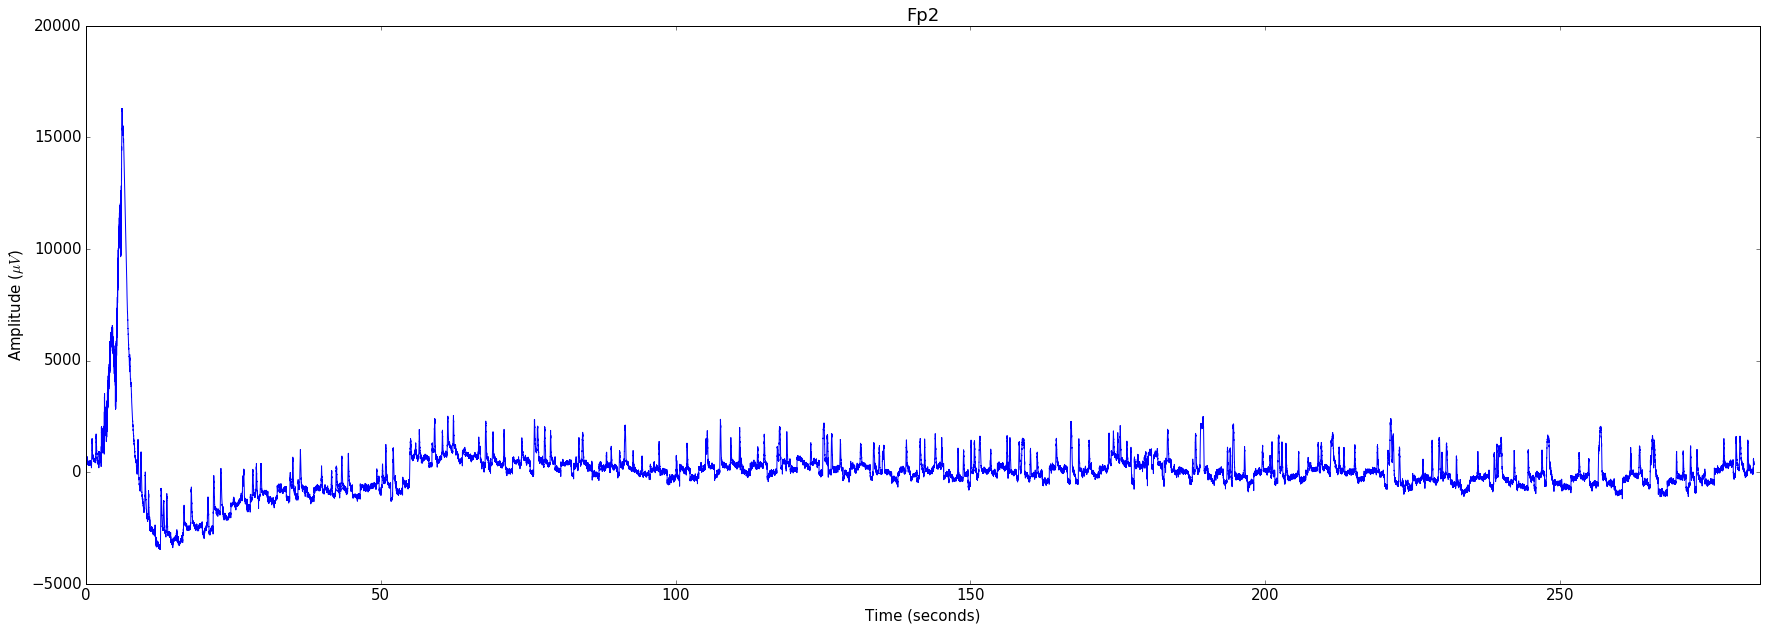

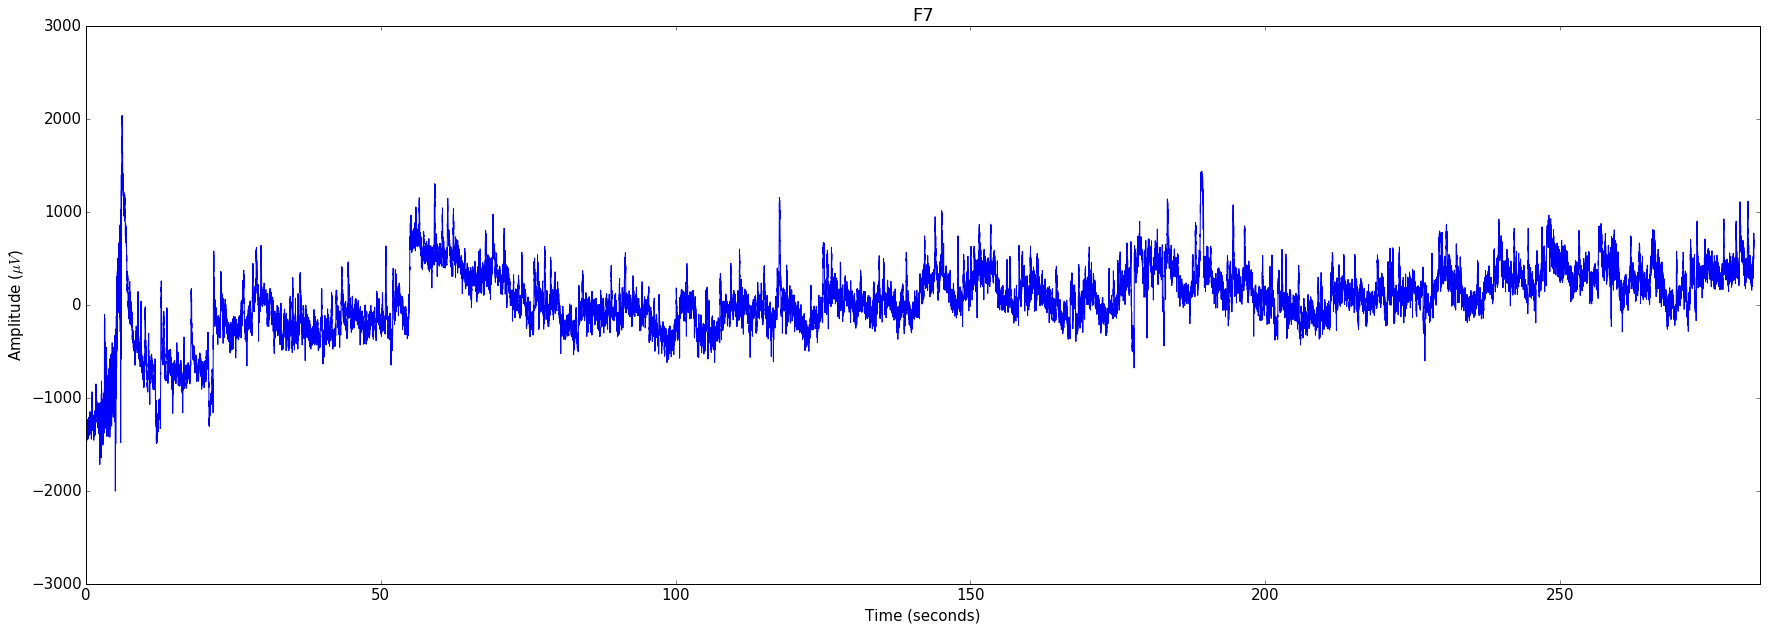

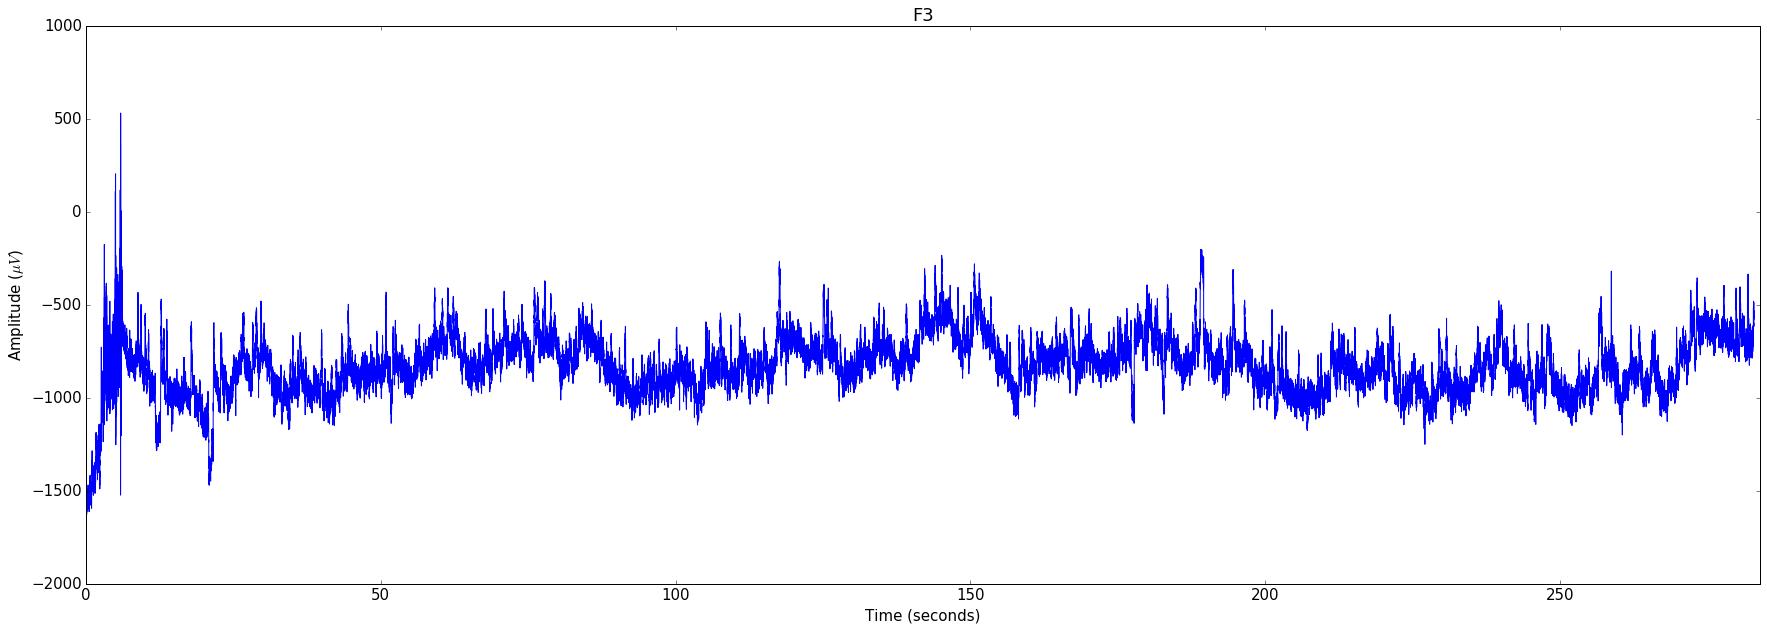

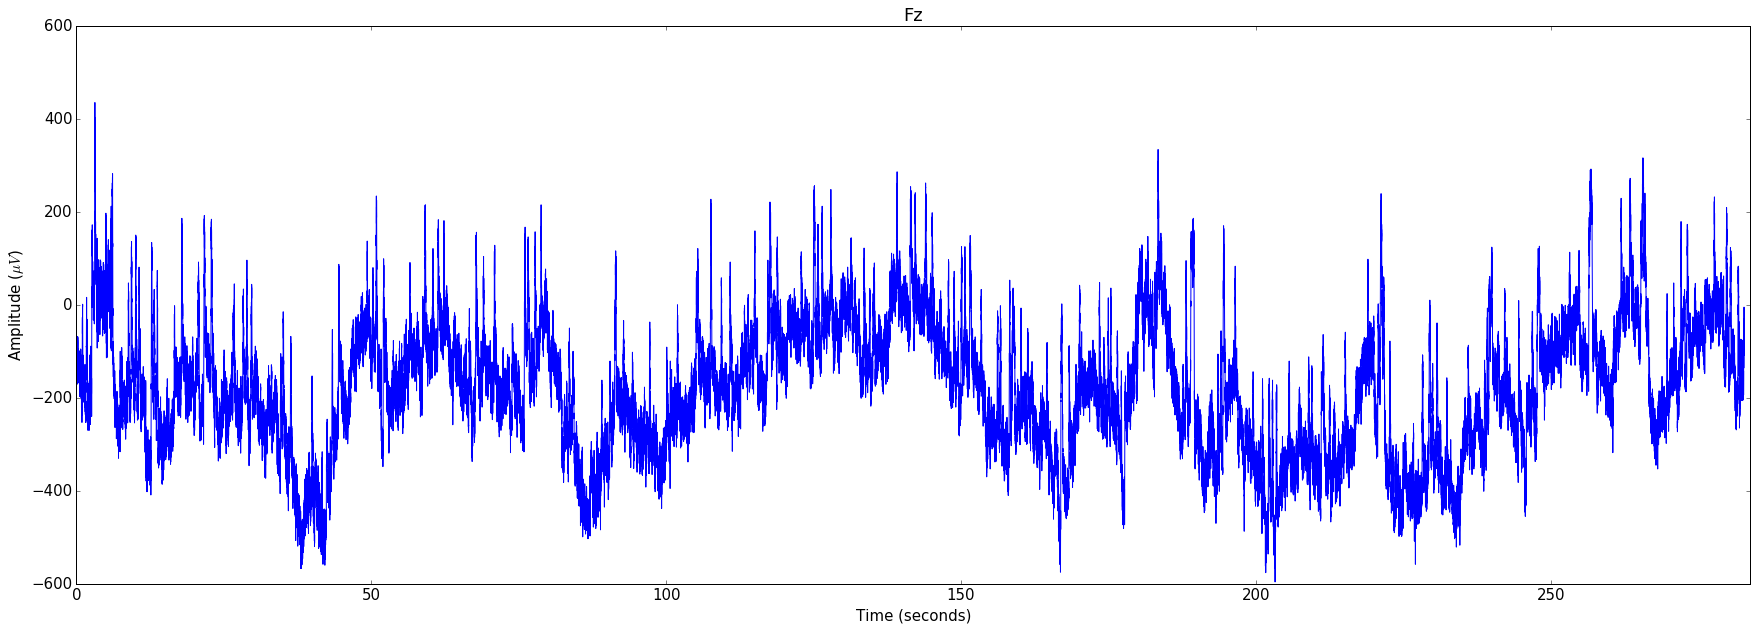

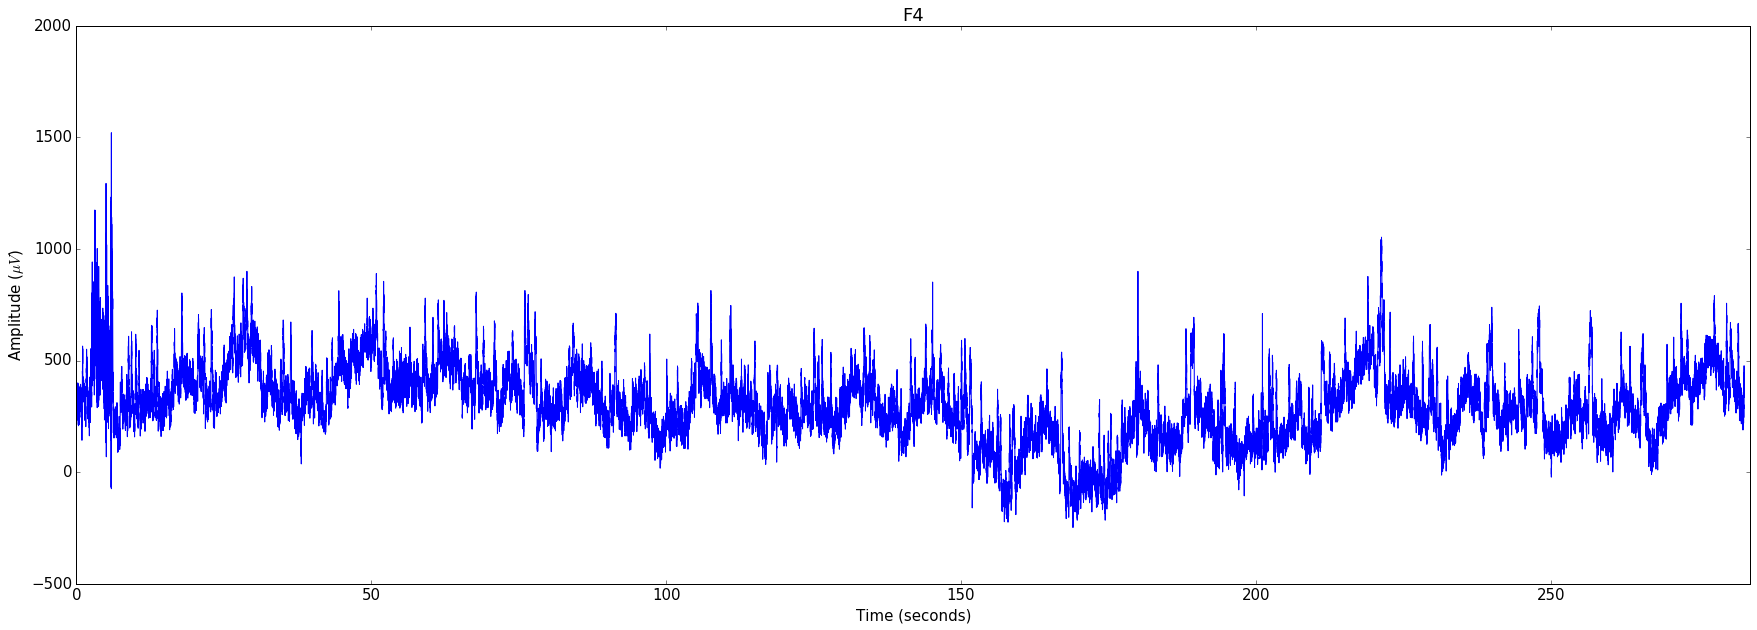

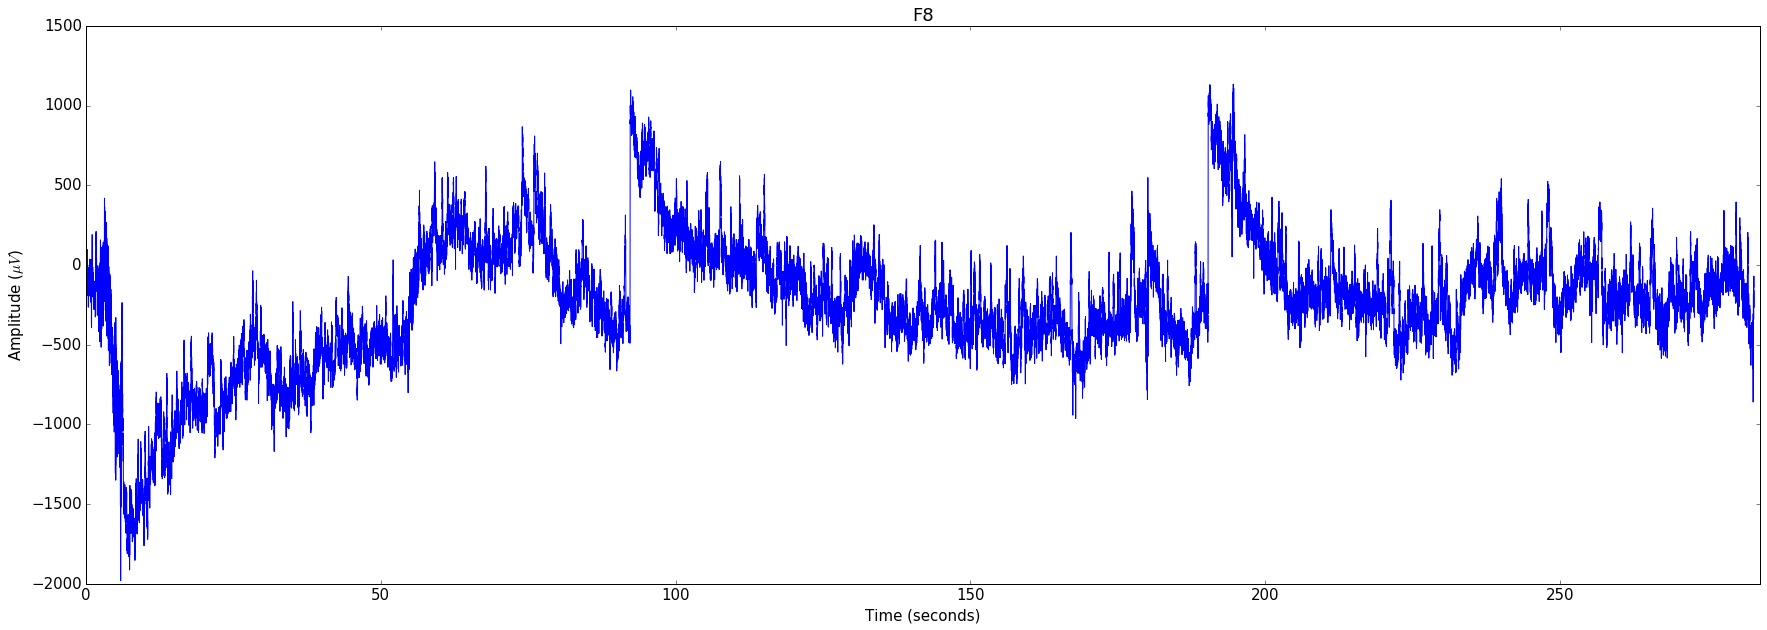

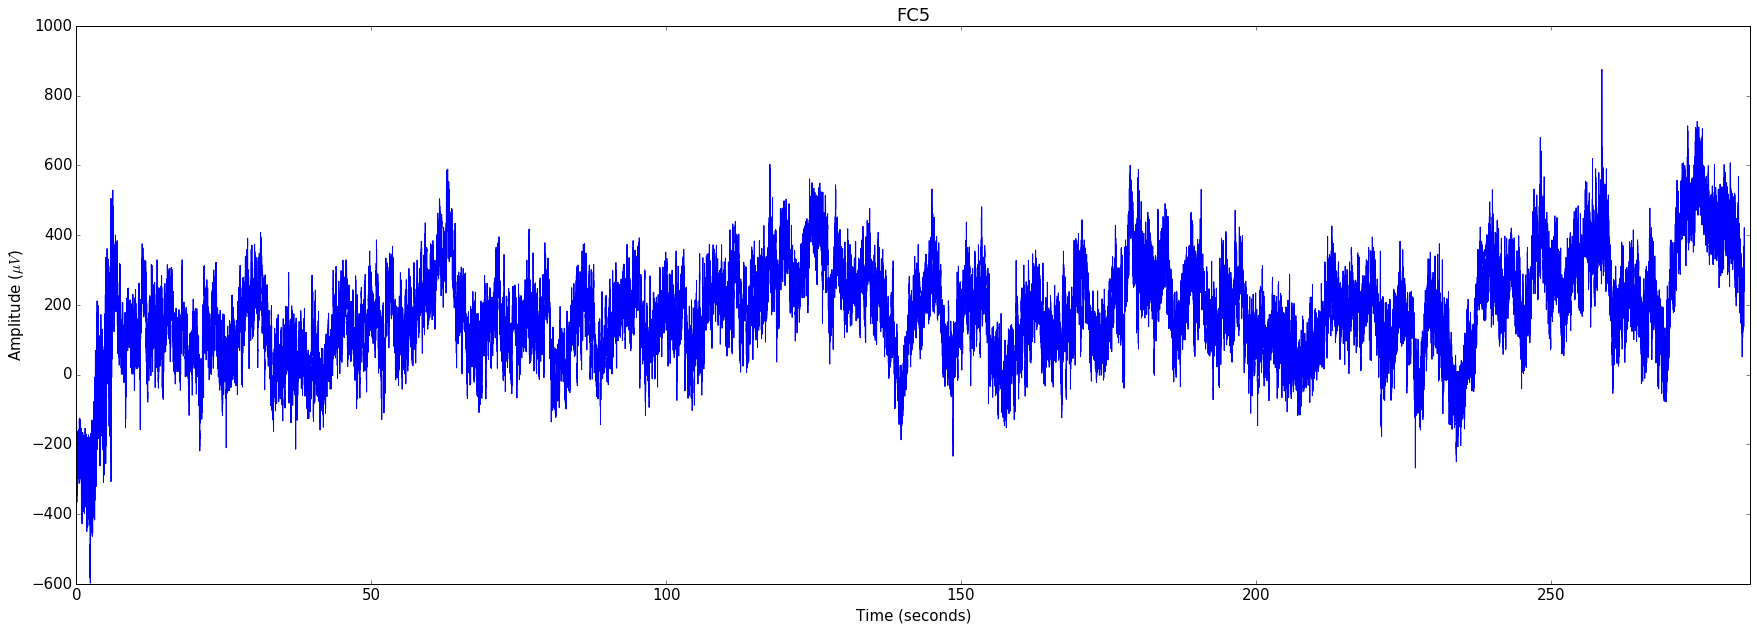

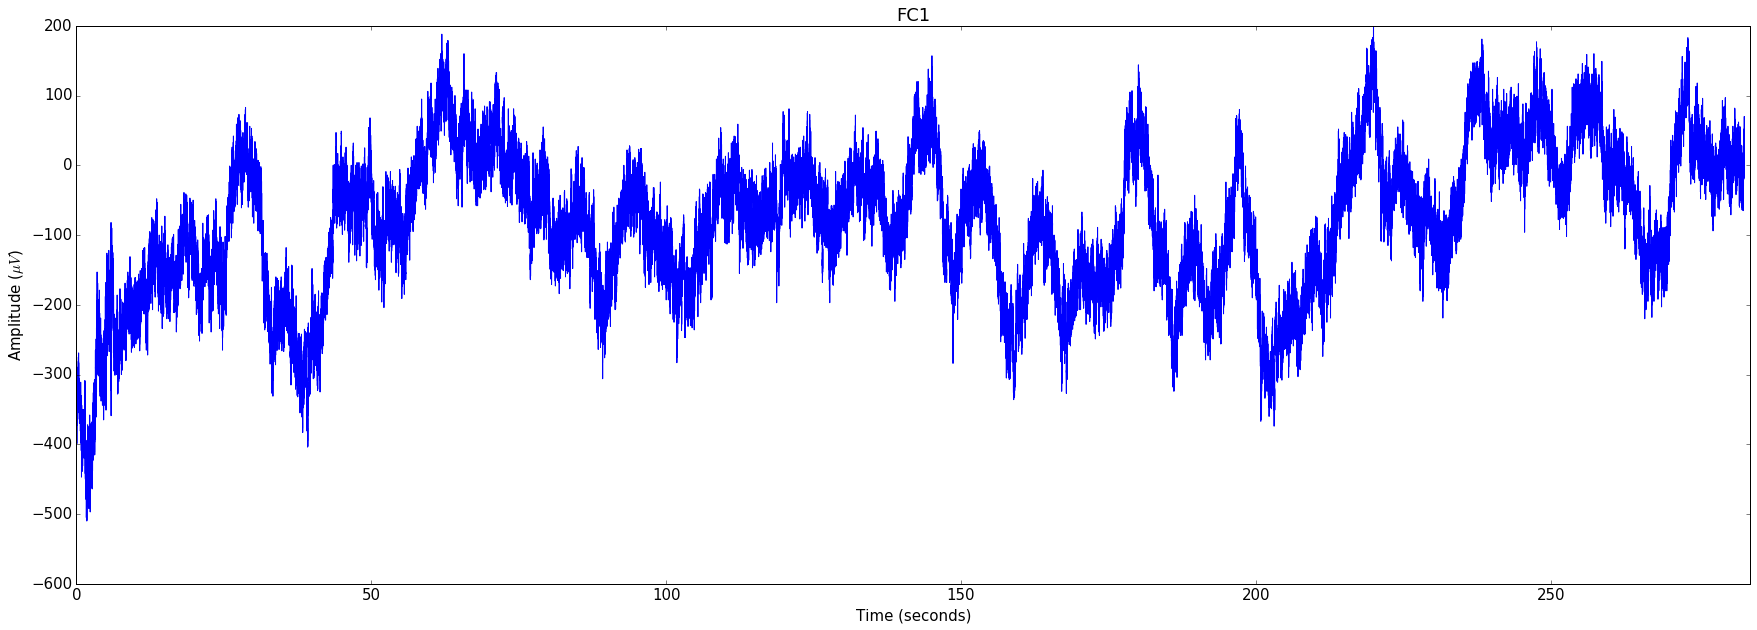

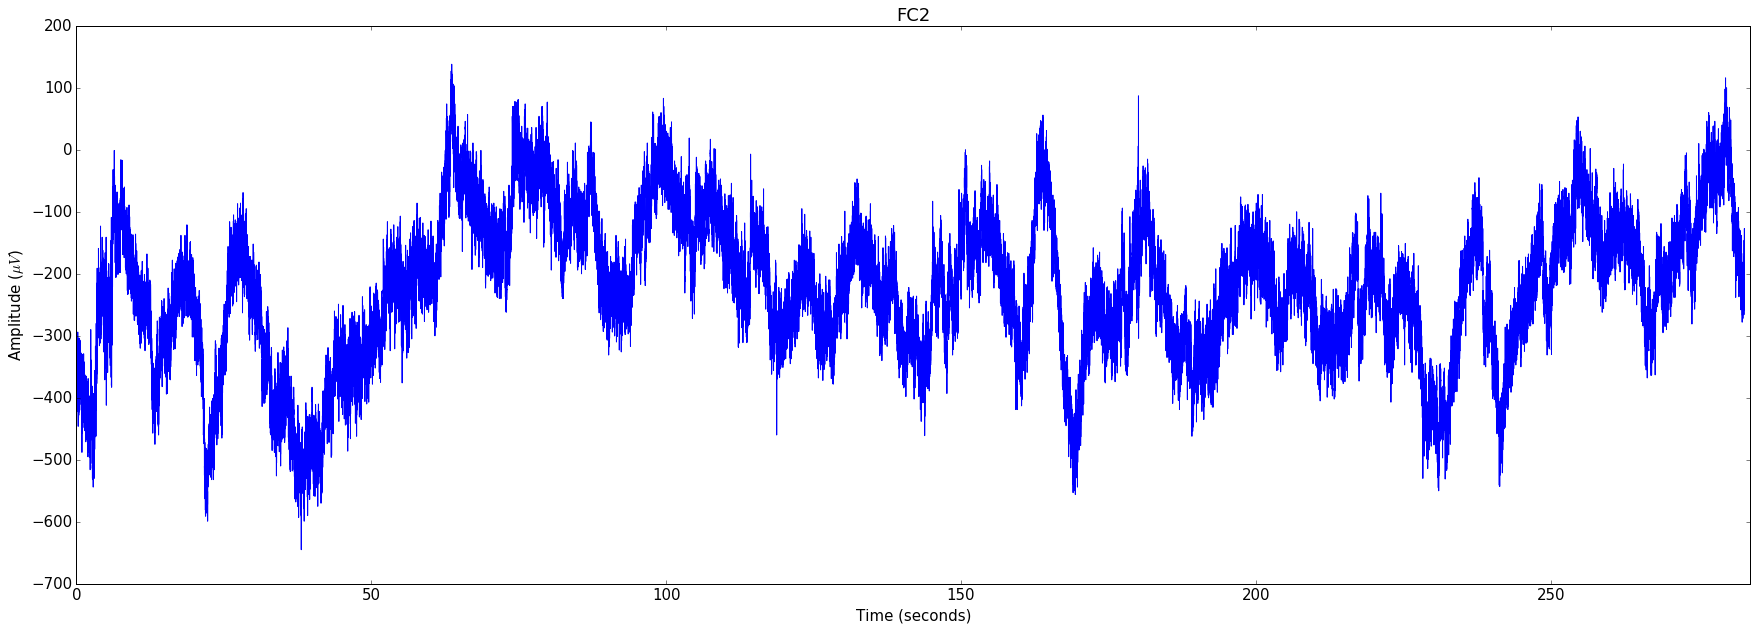

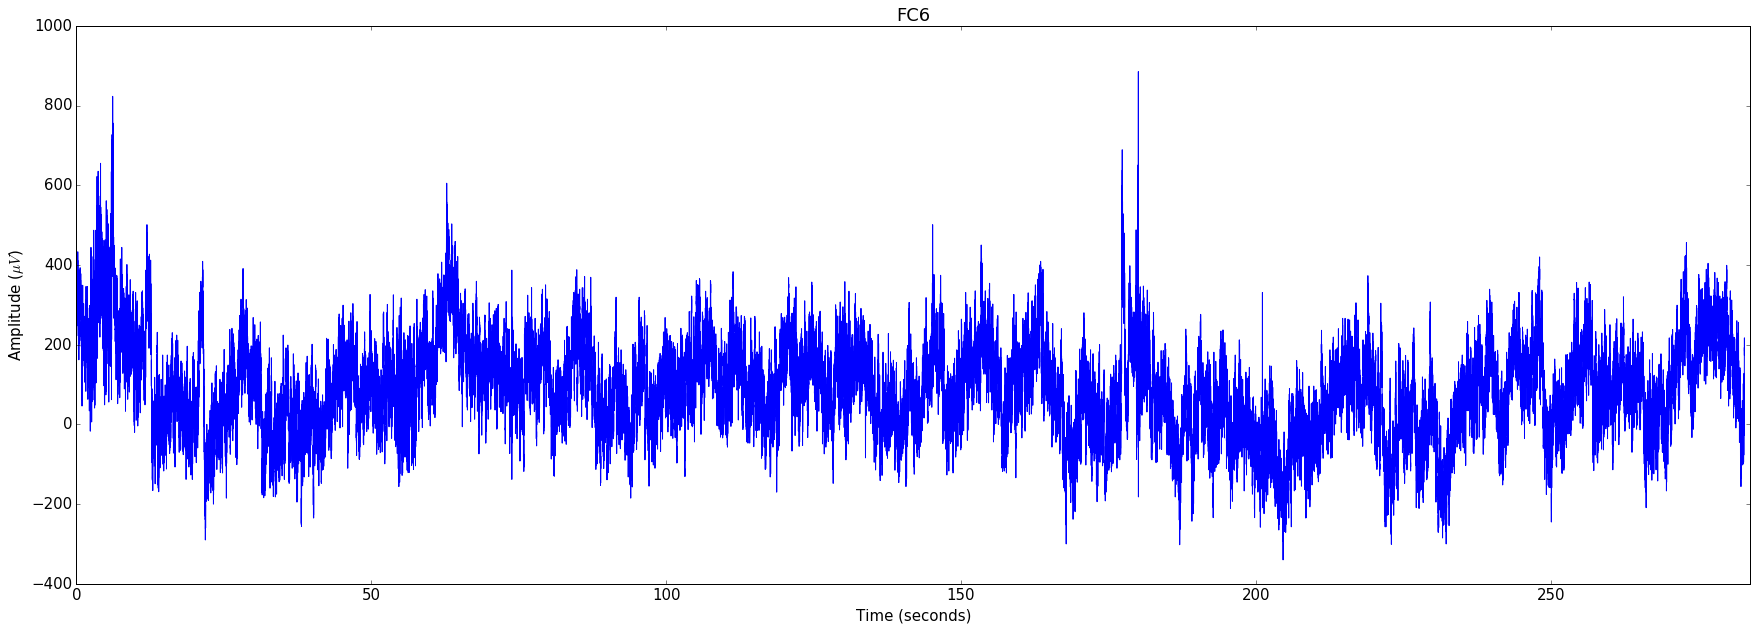

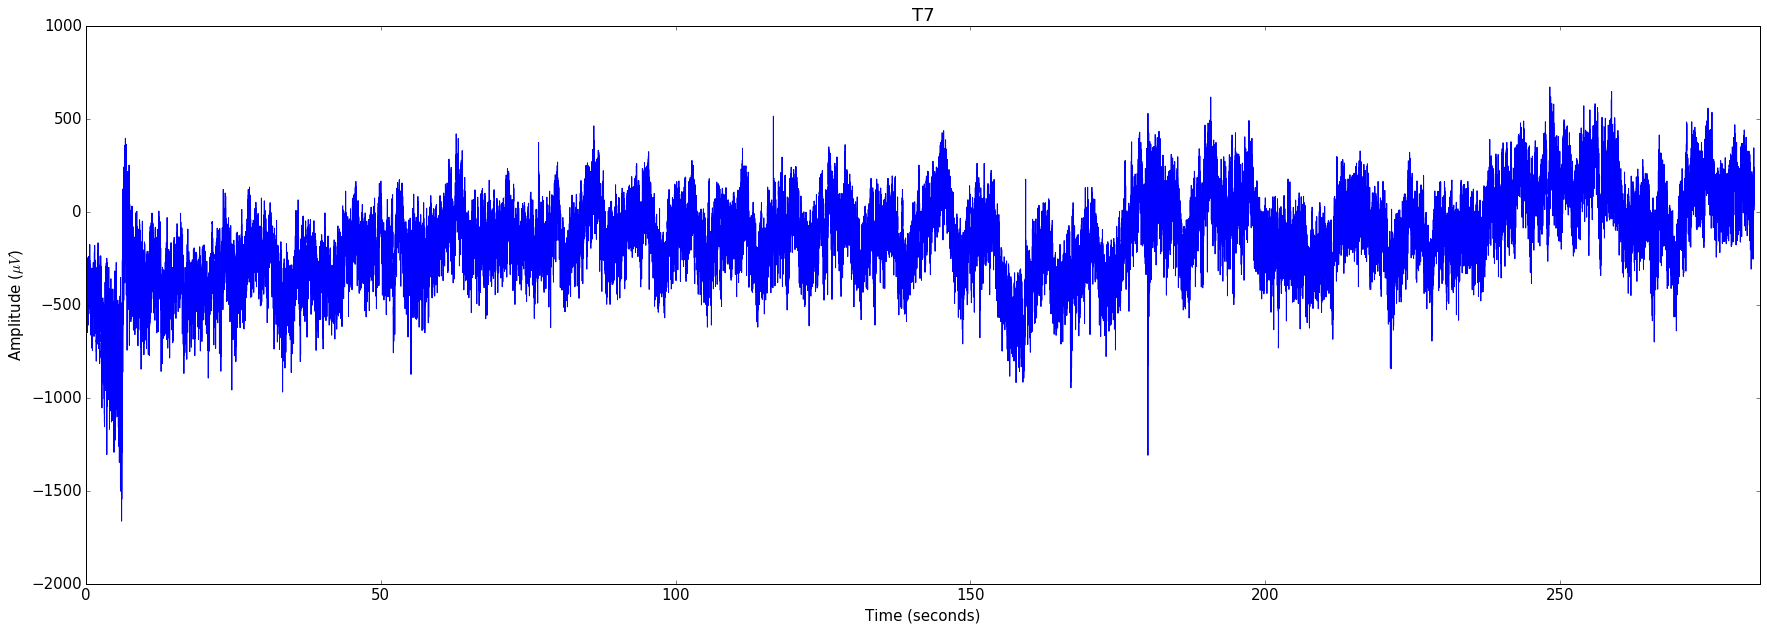

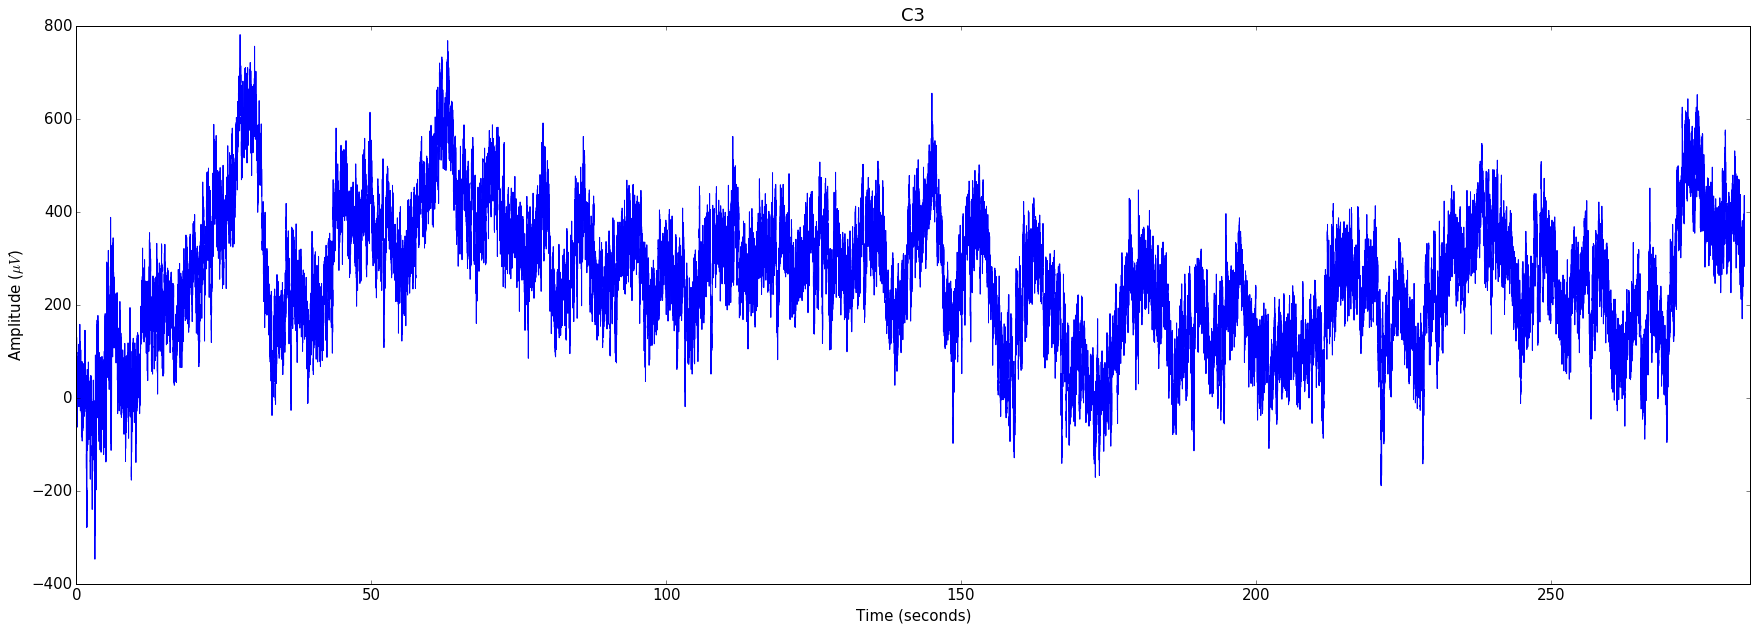

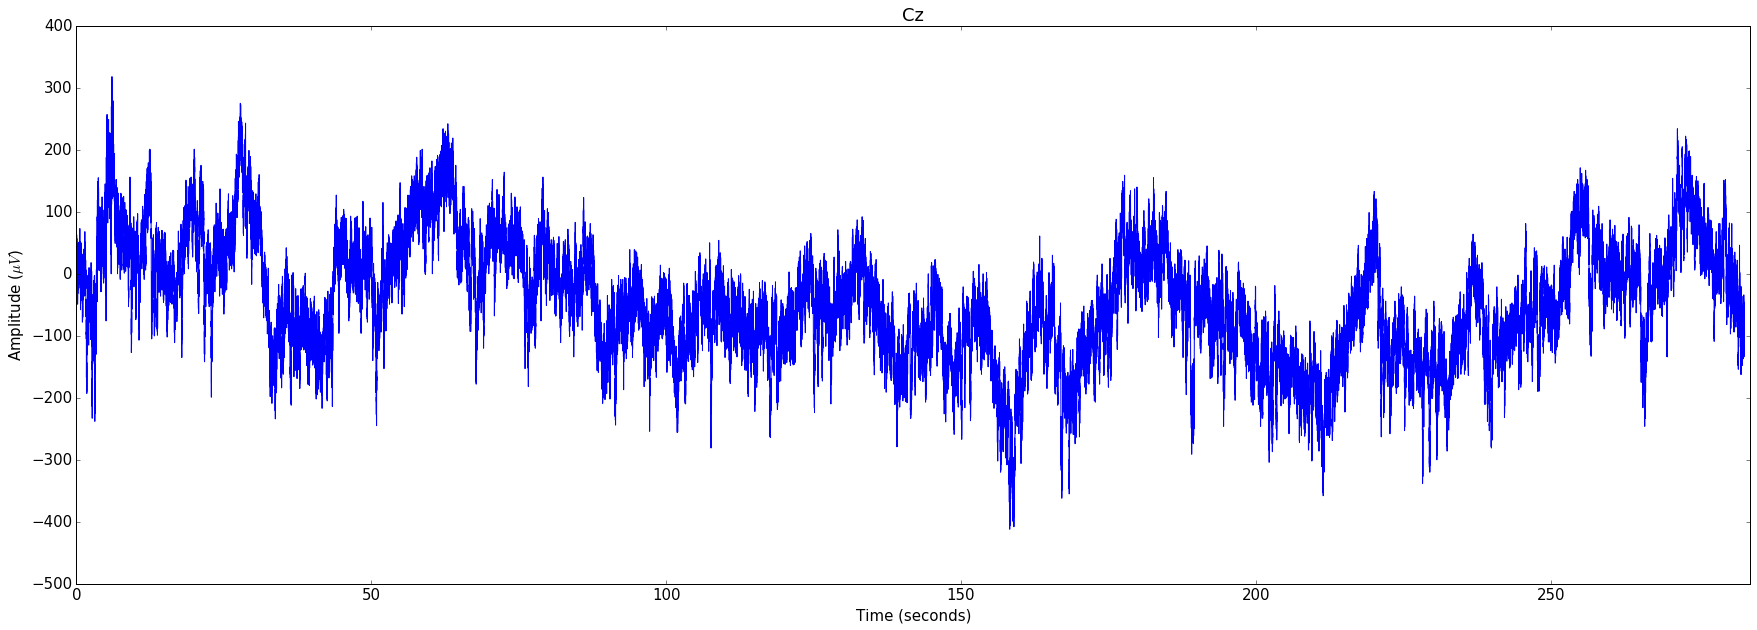

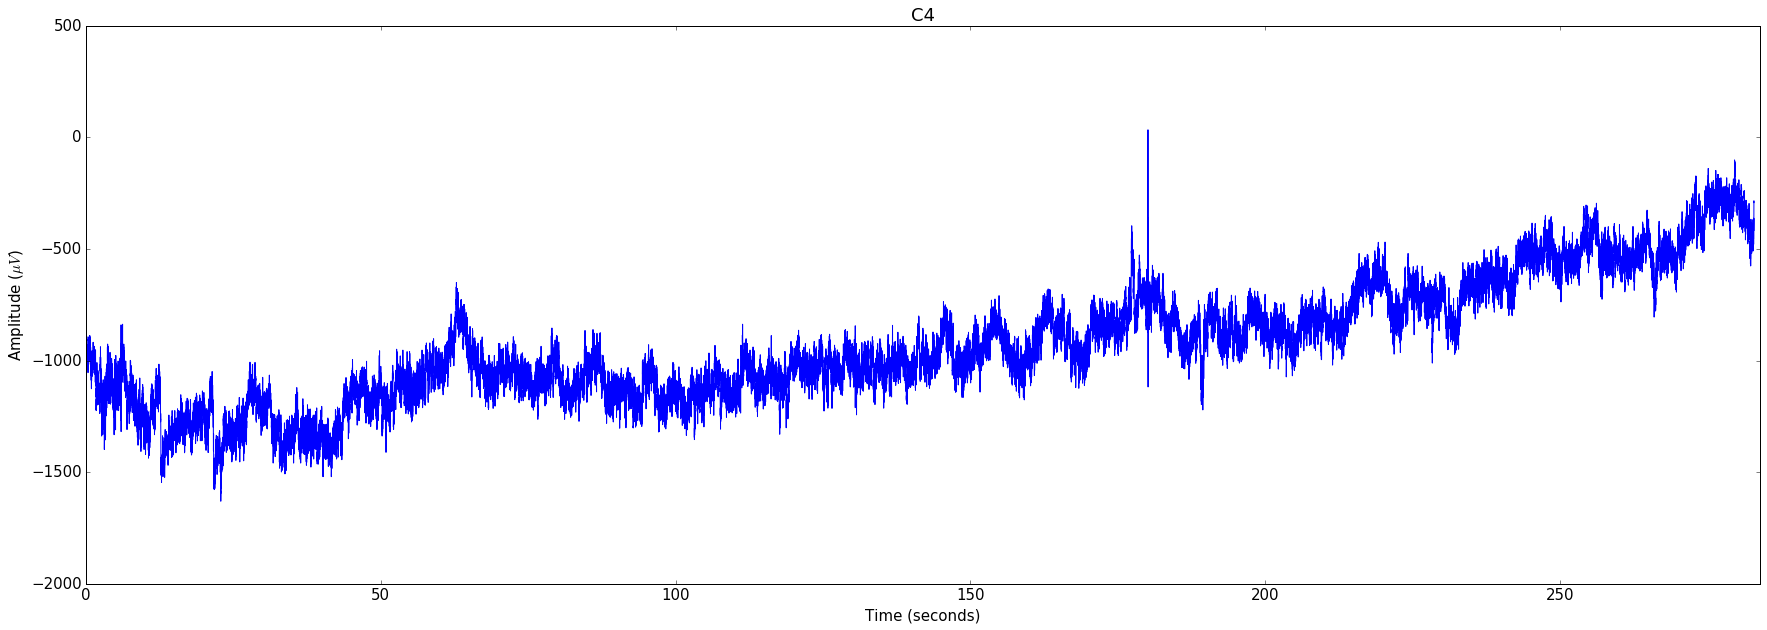

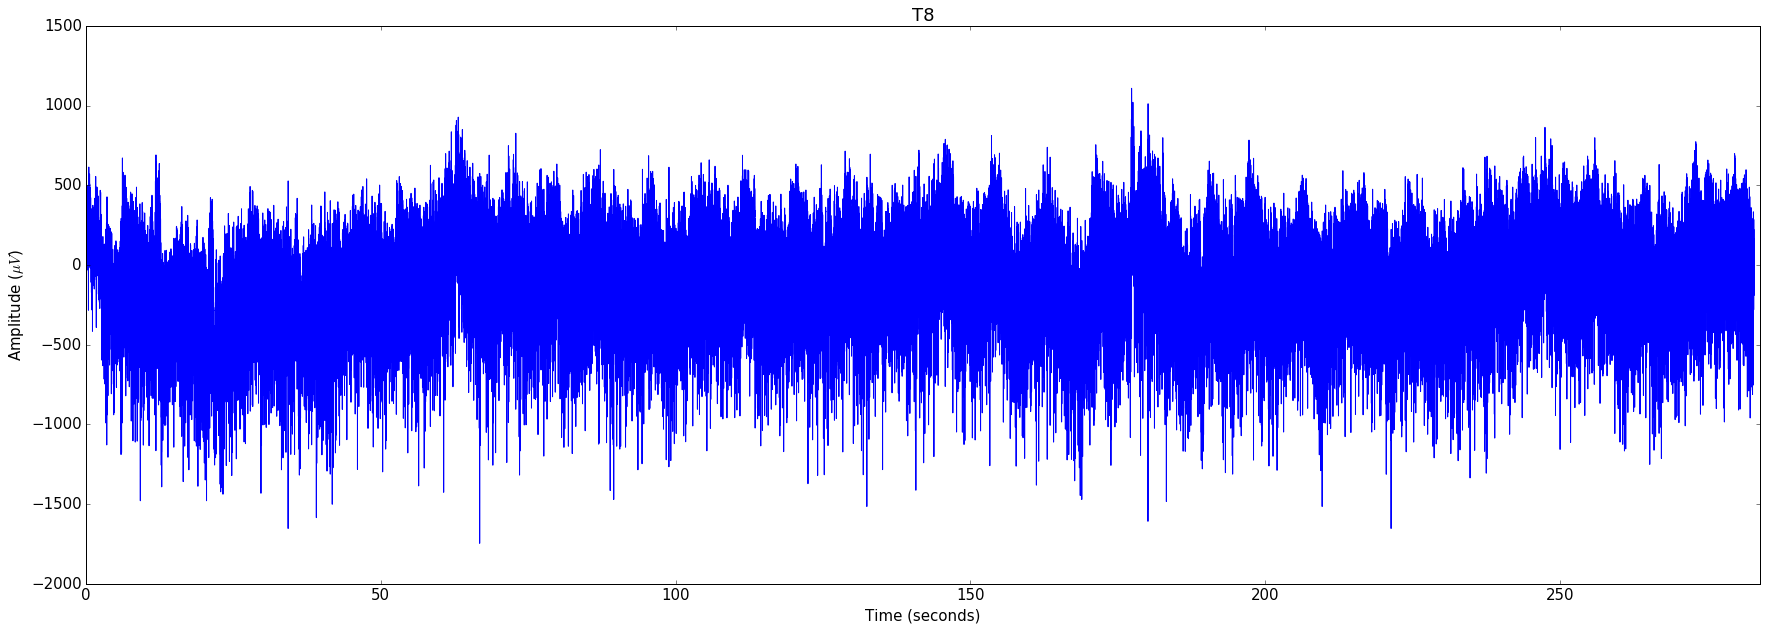

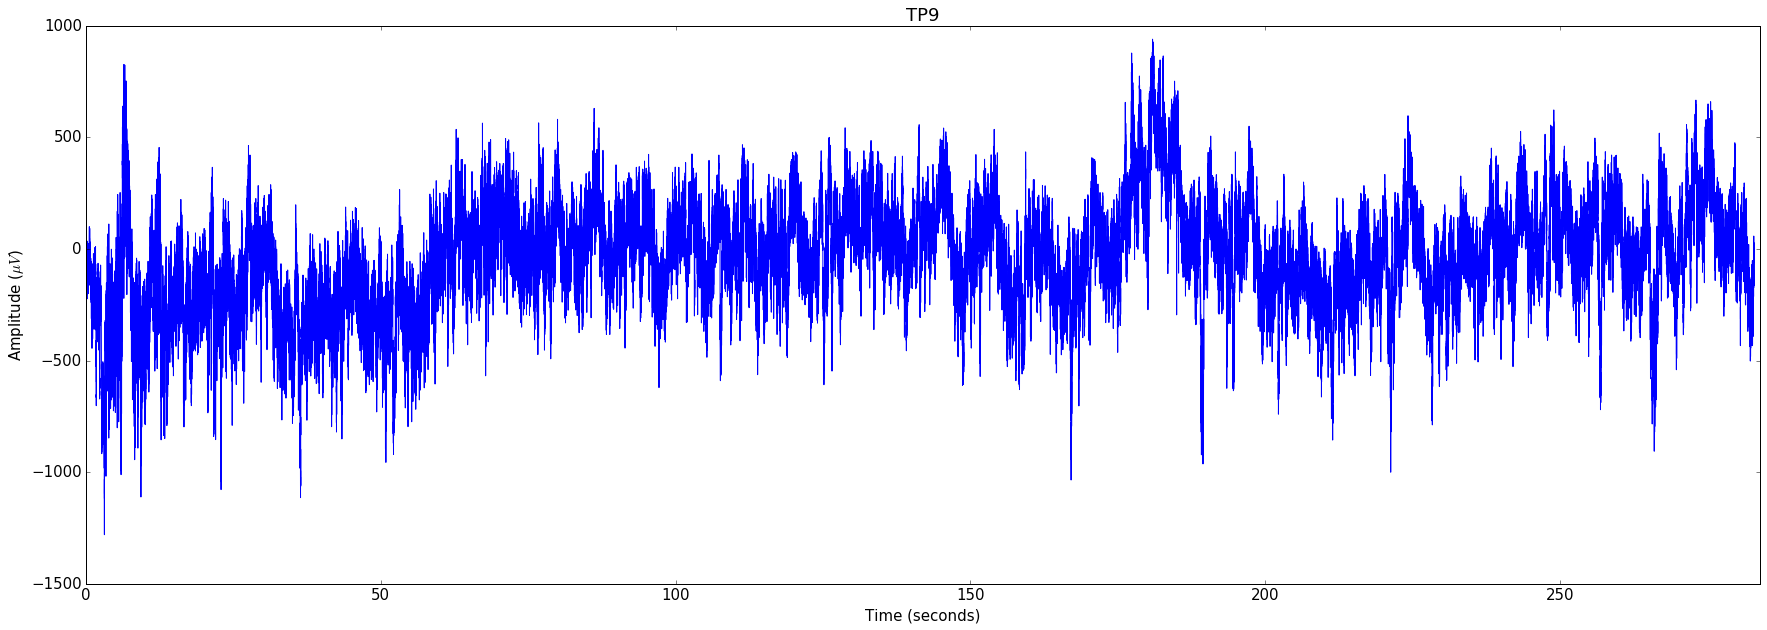

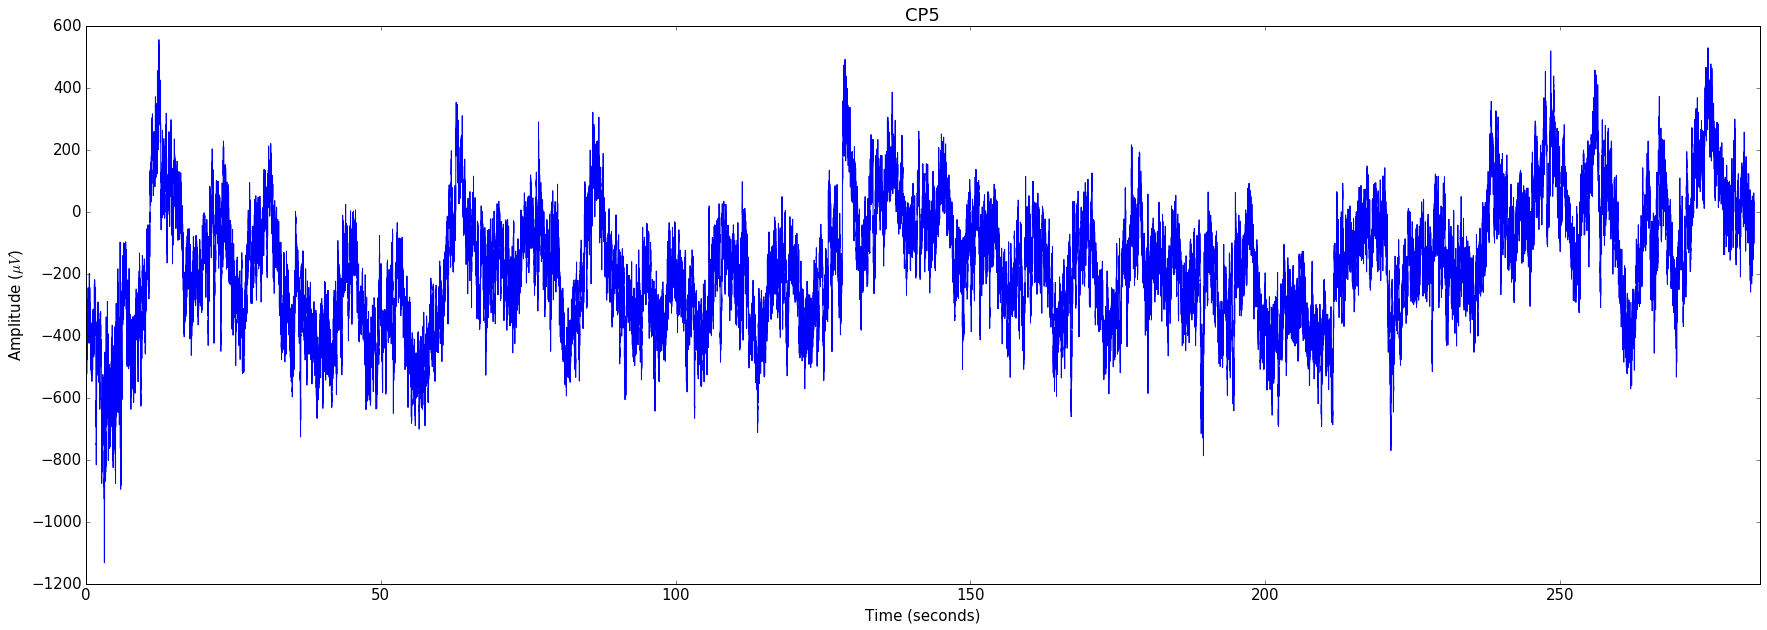

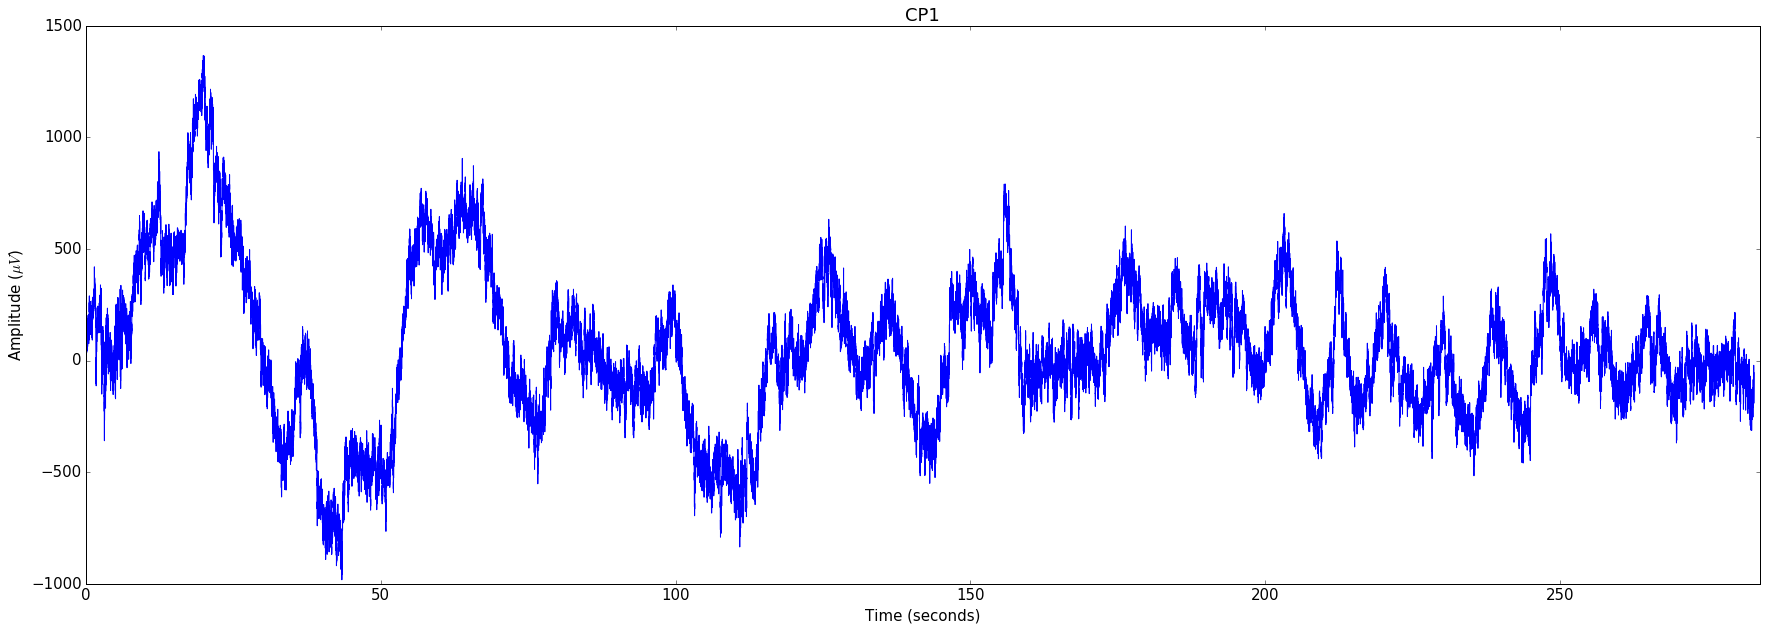

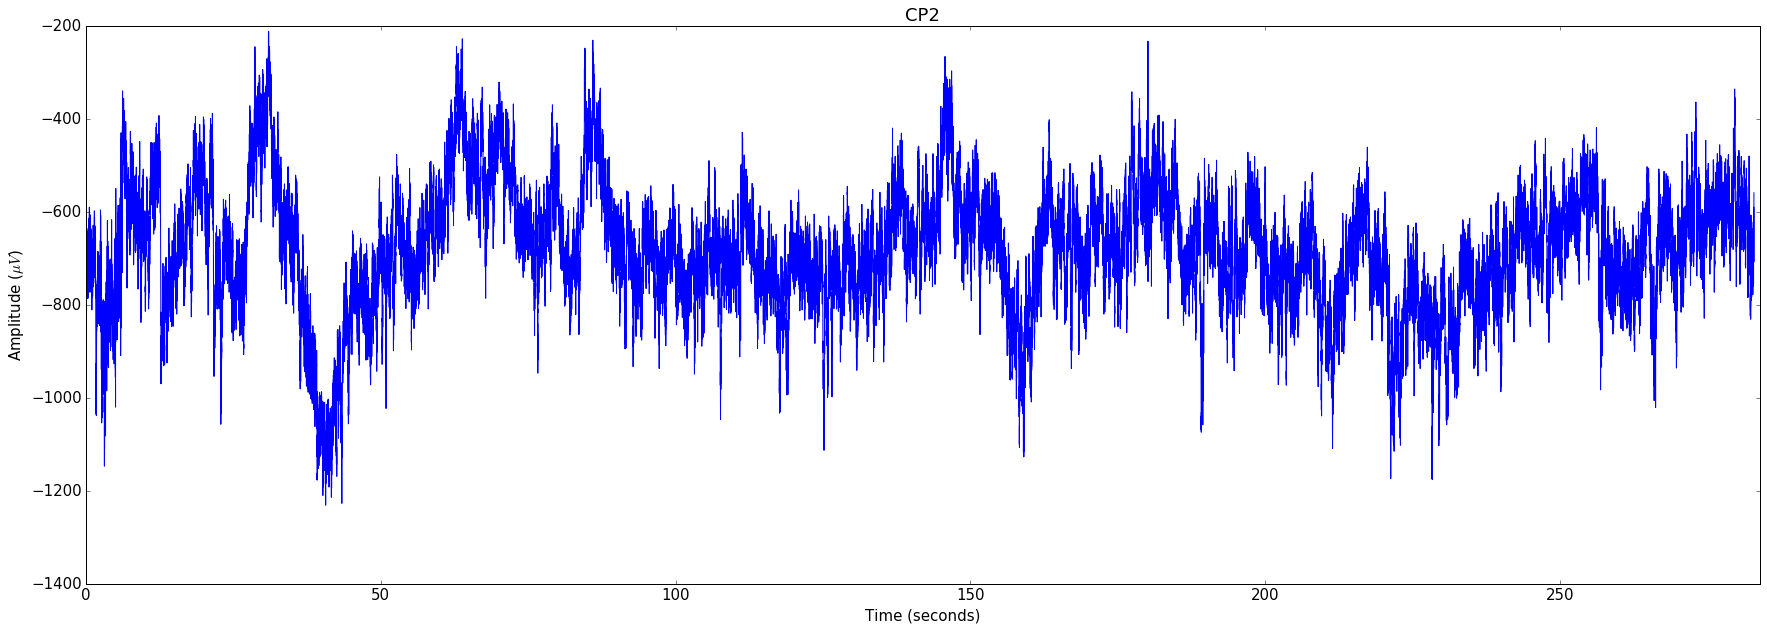

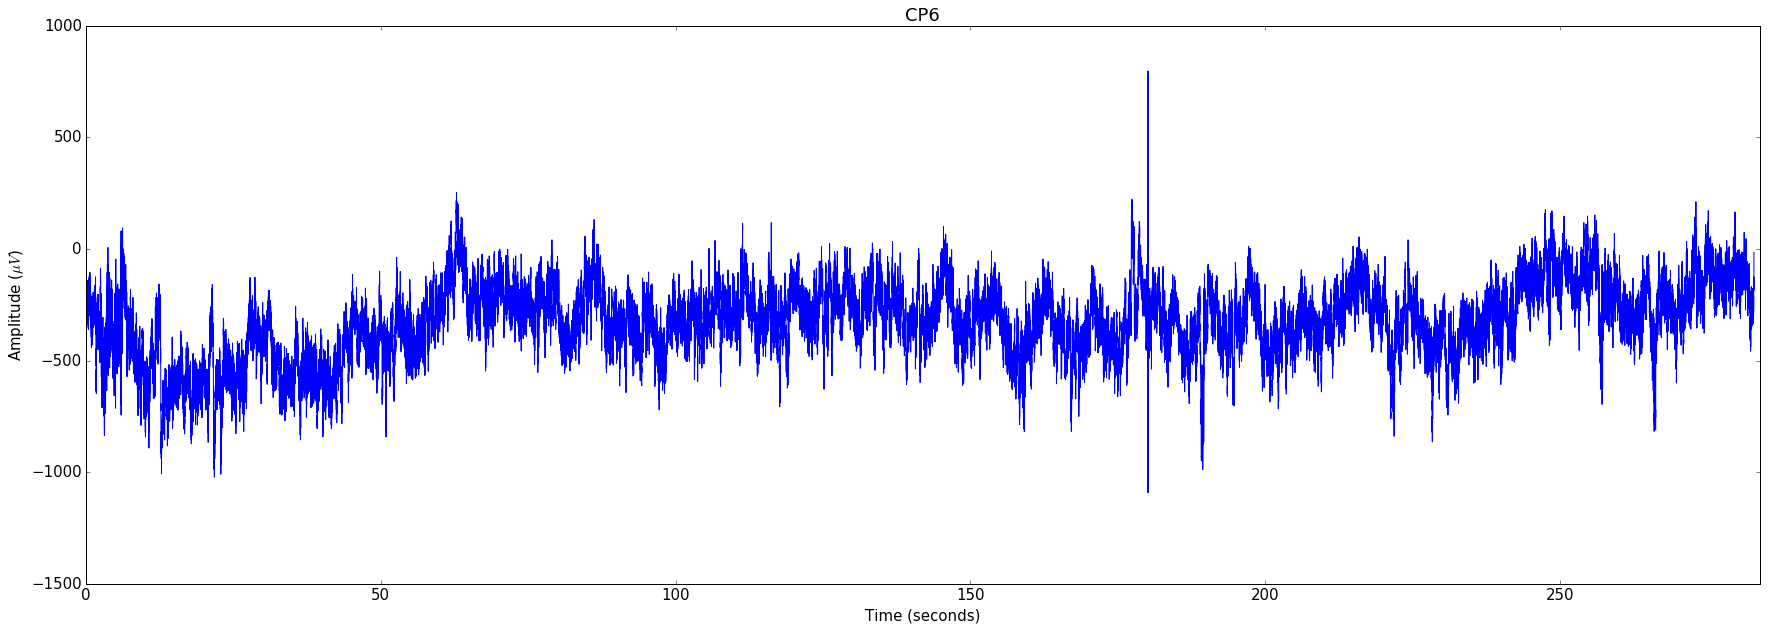

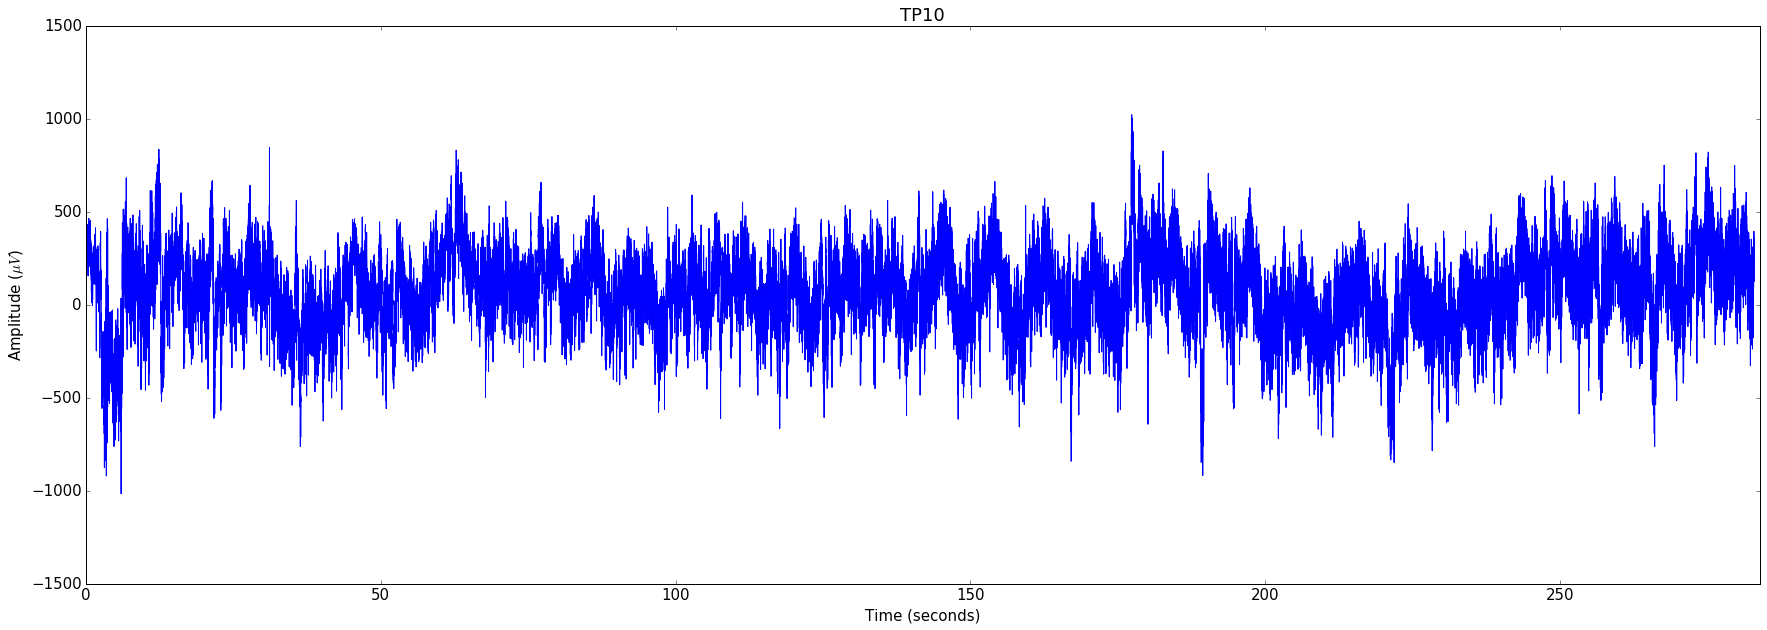

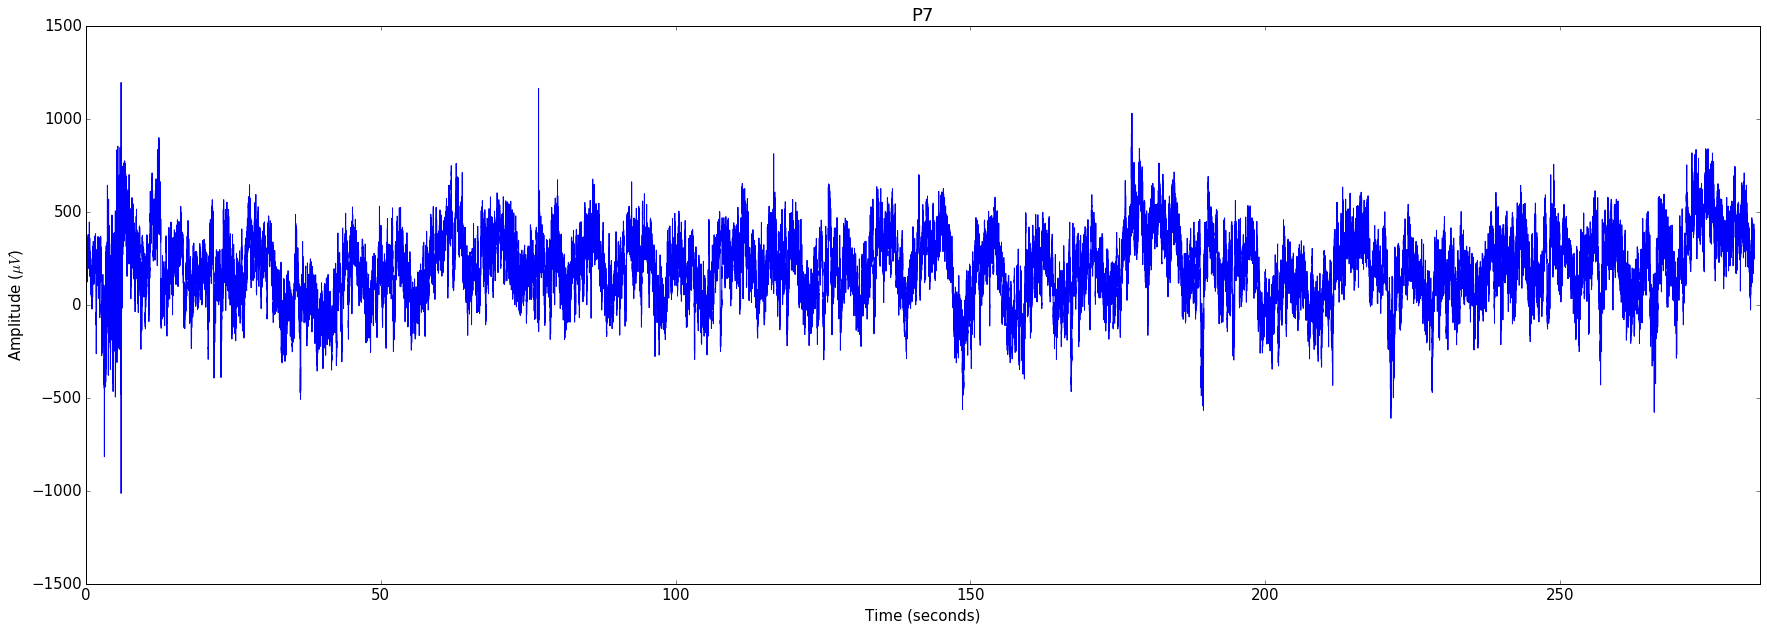

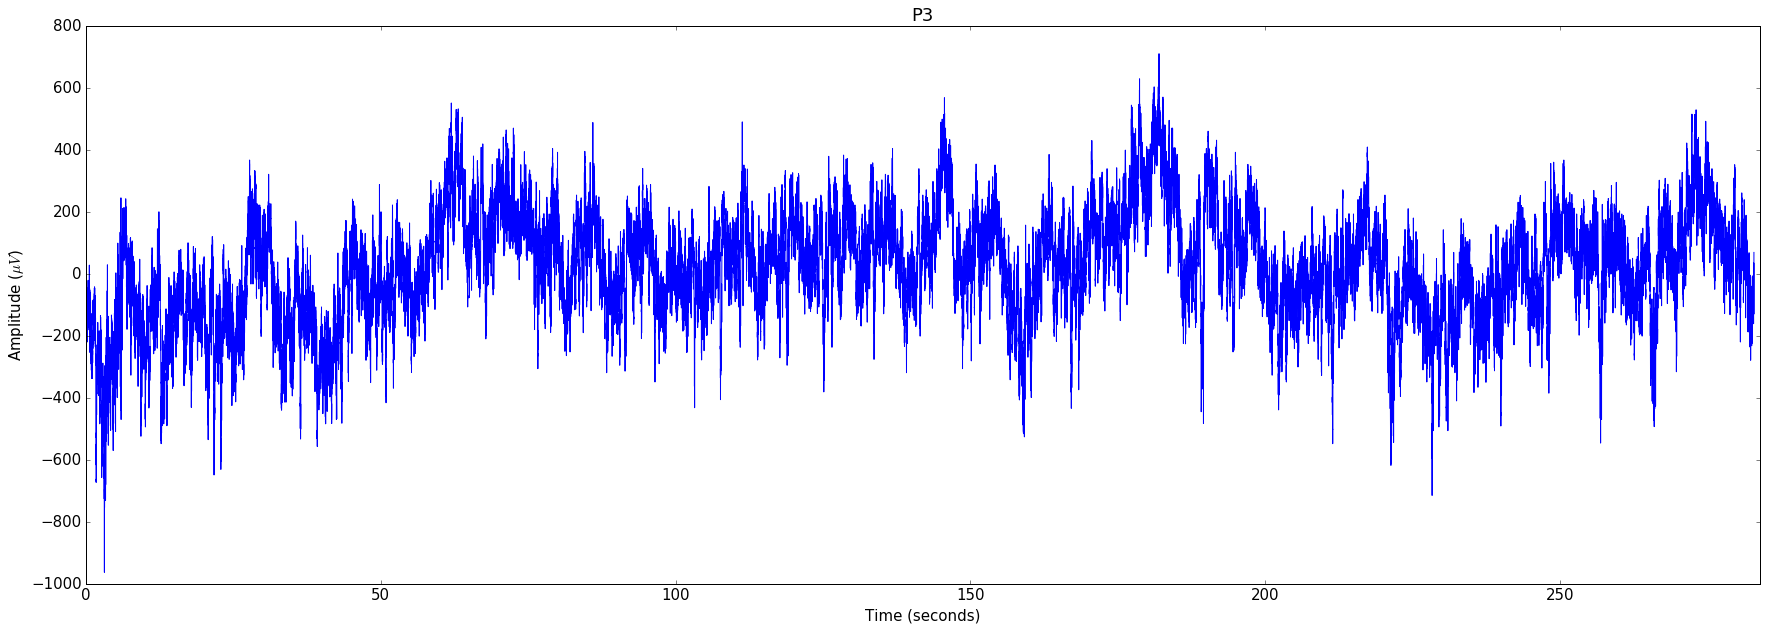

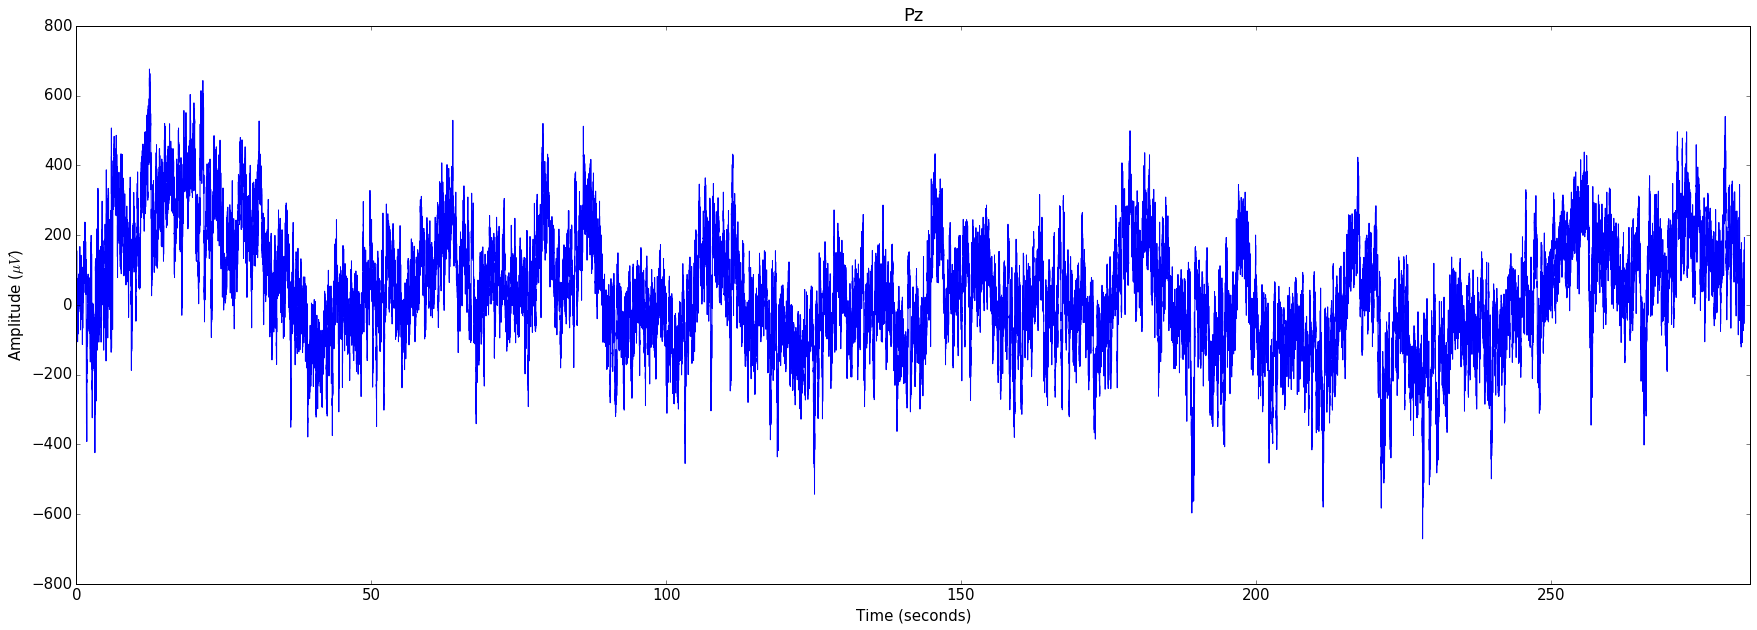

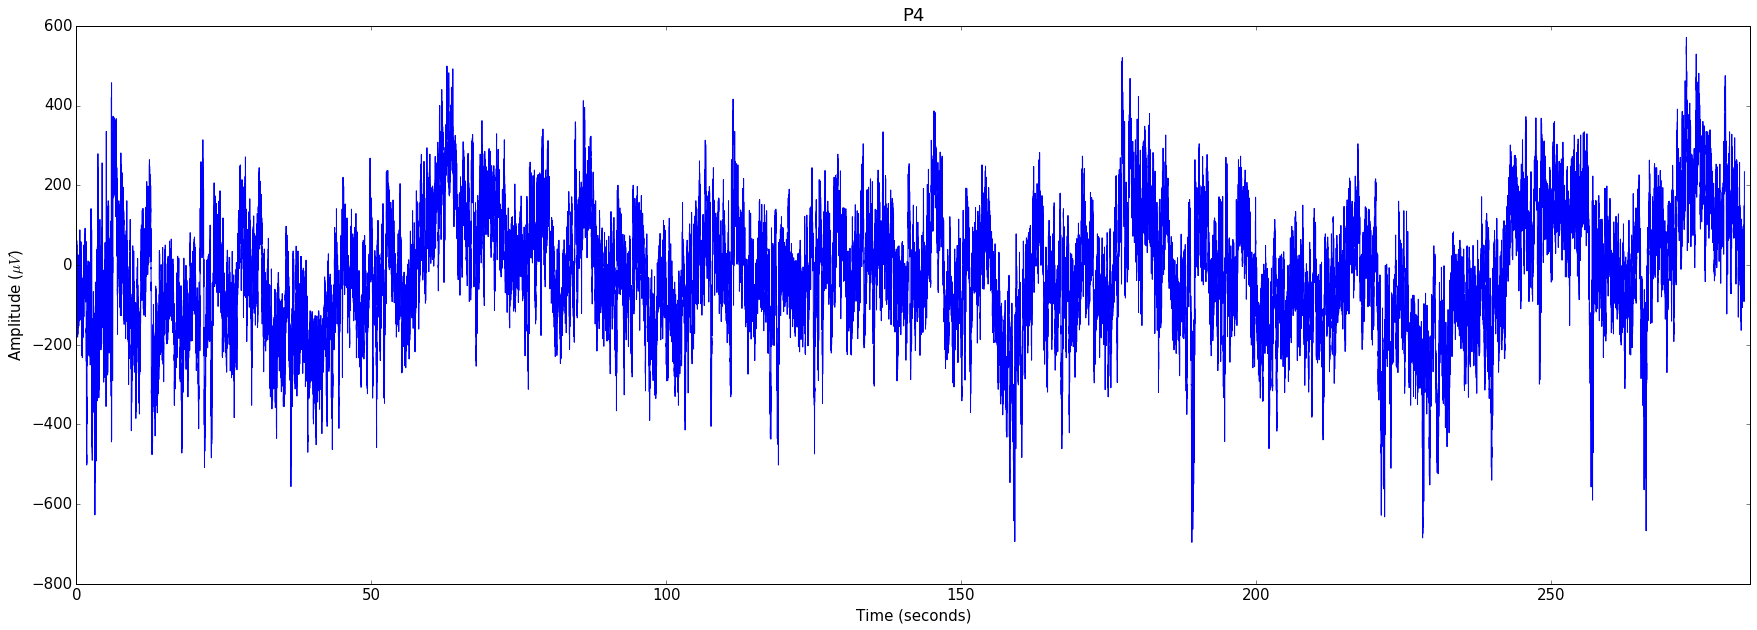

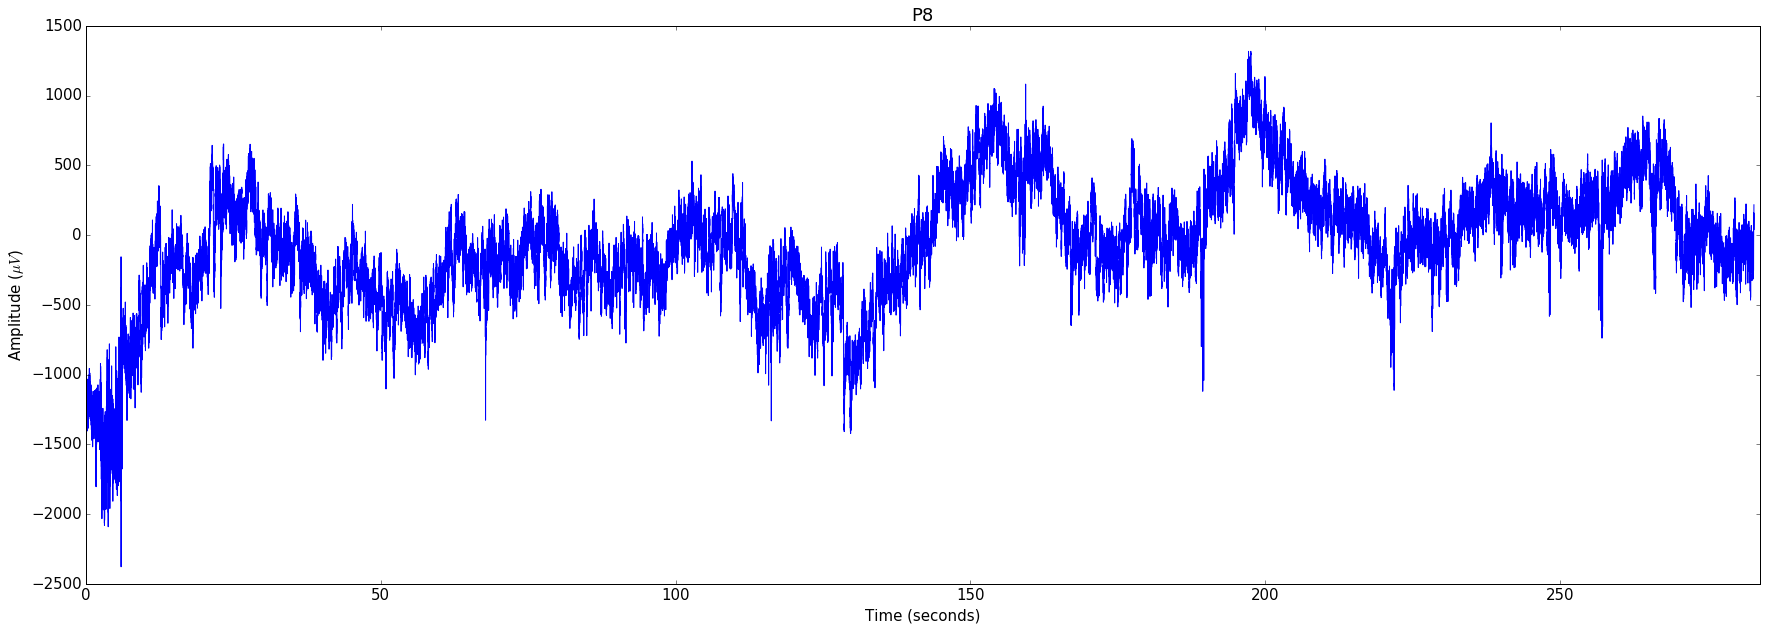

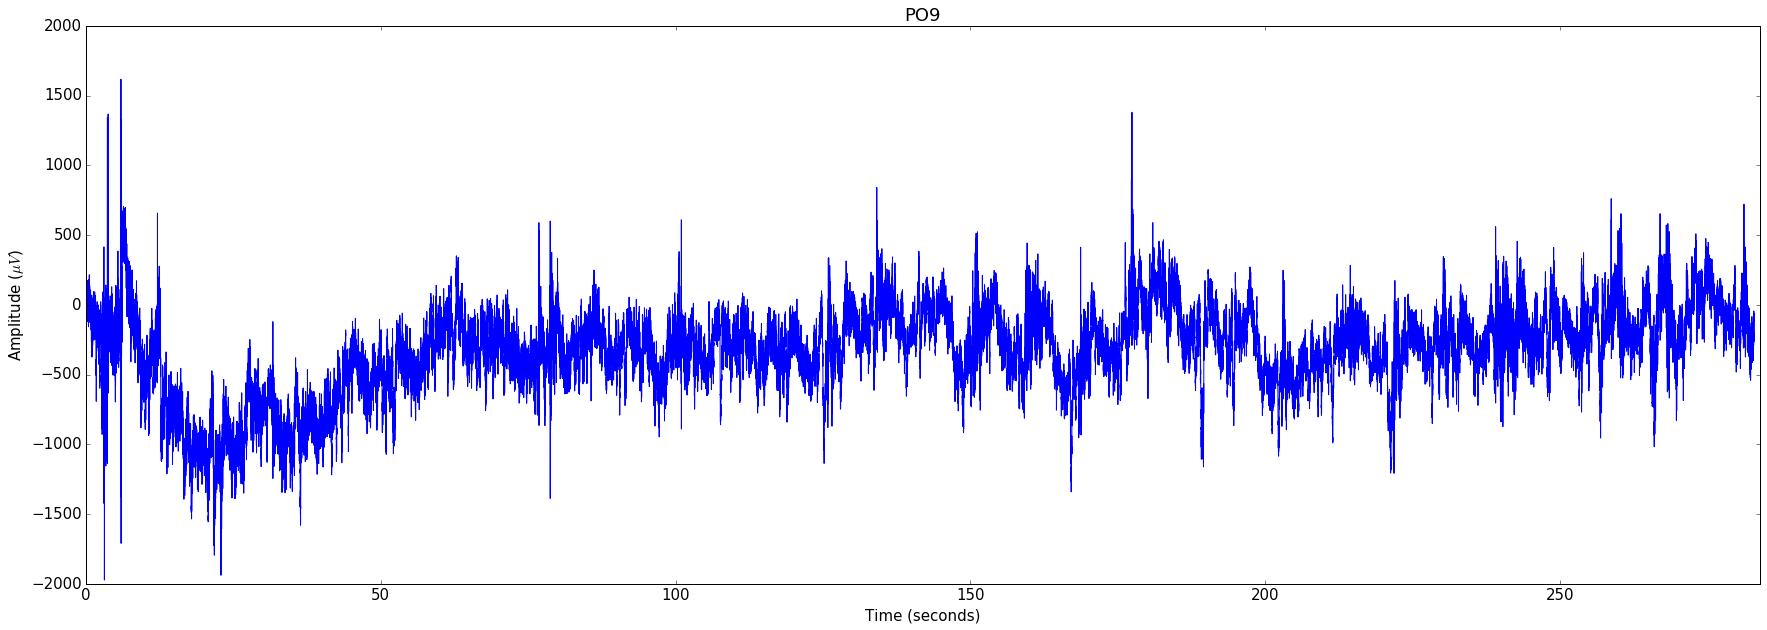

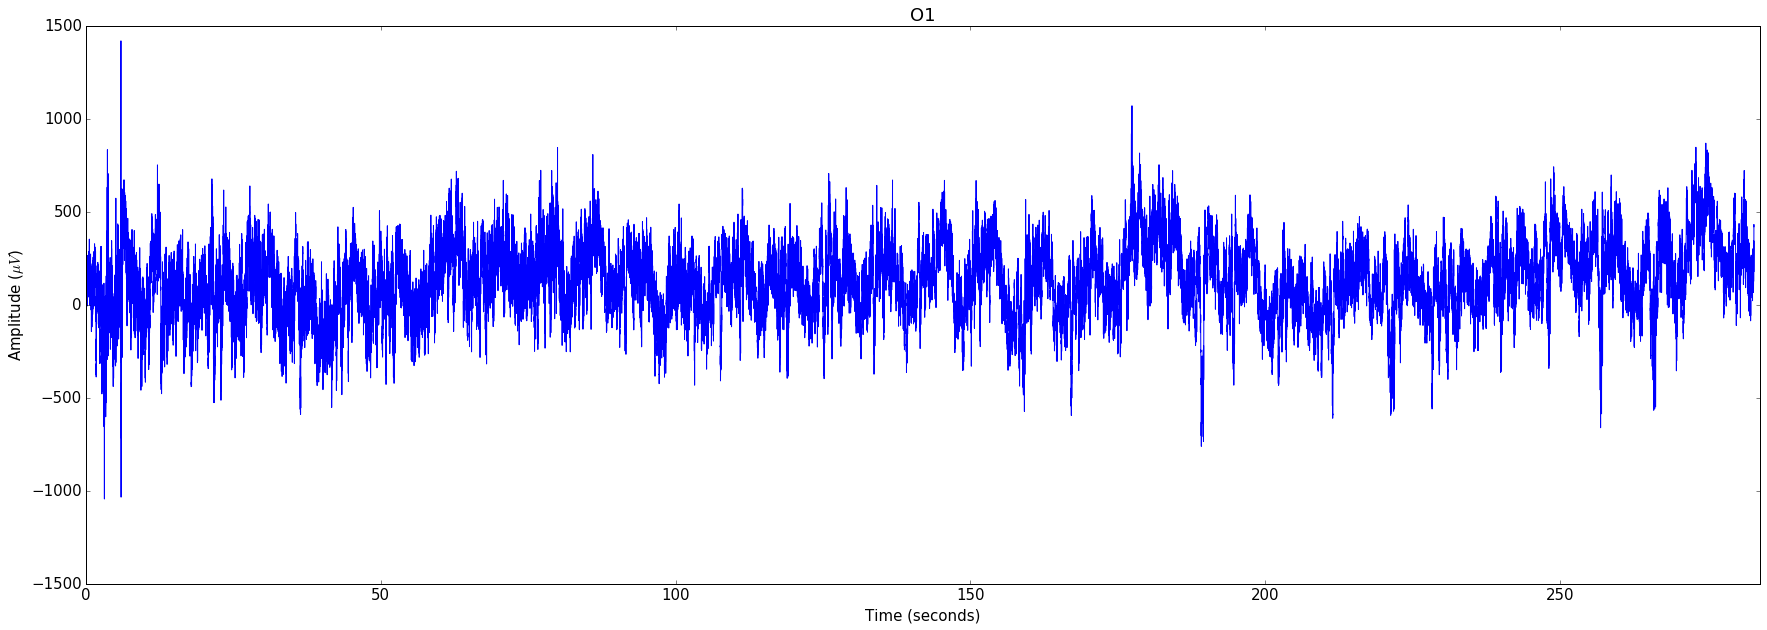

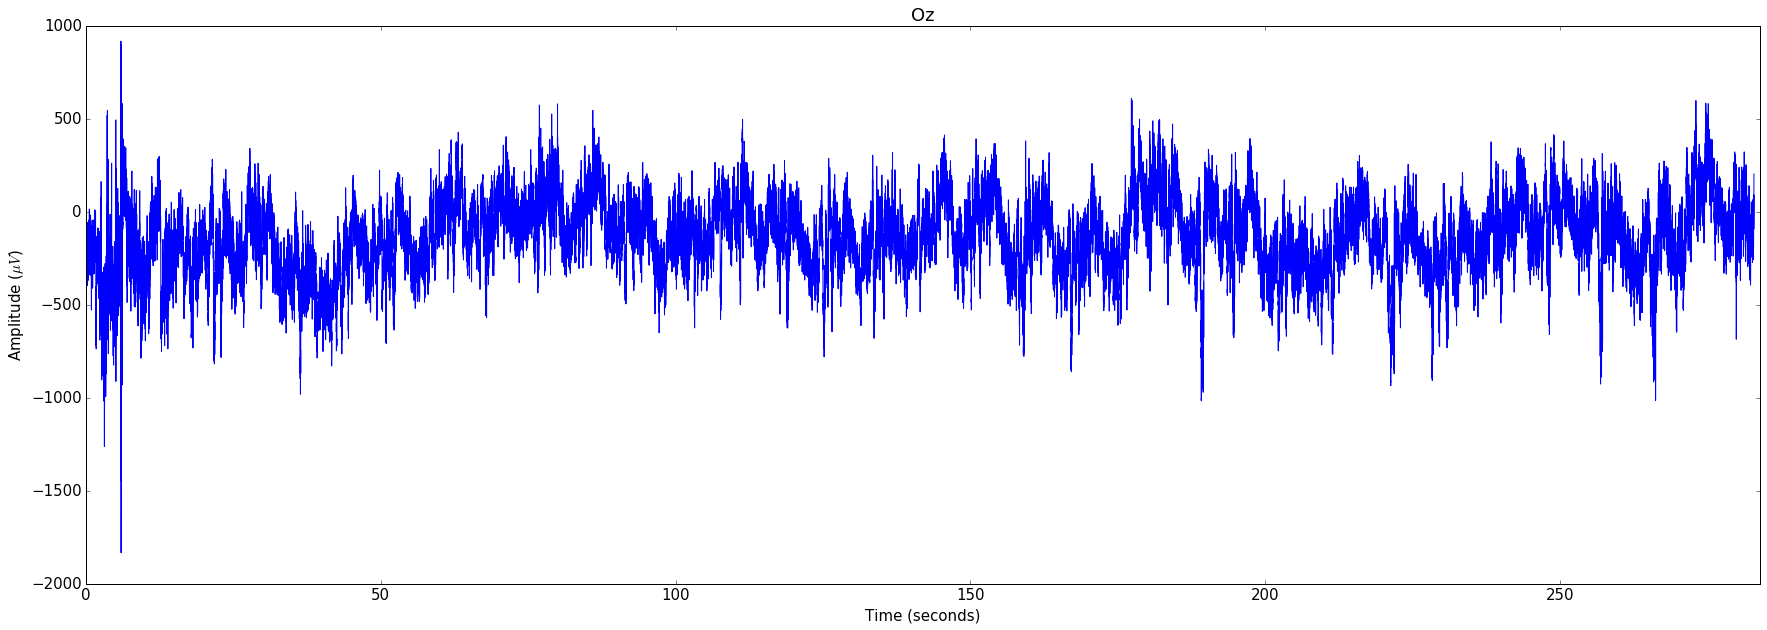

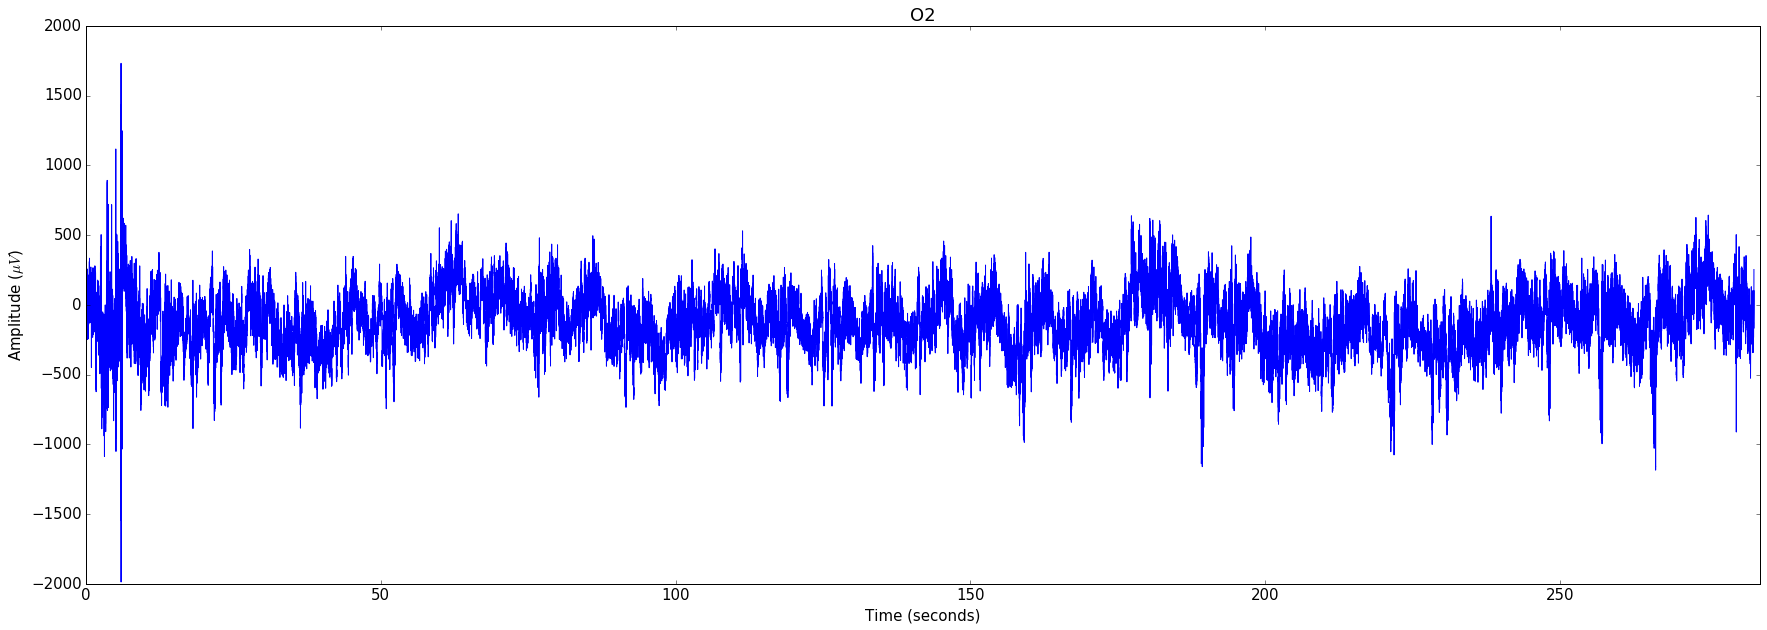

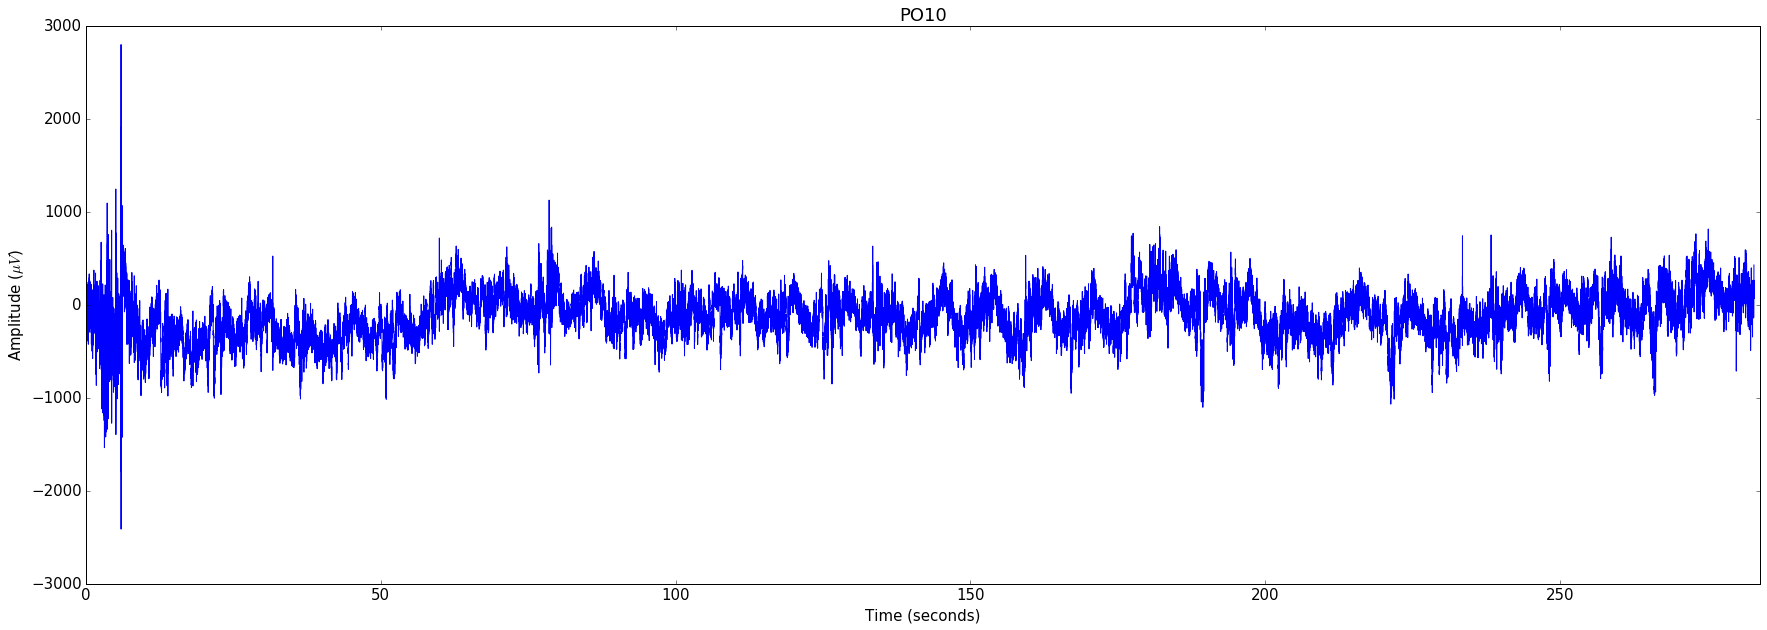

In [9]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


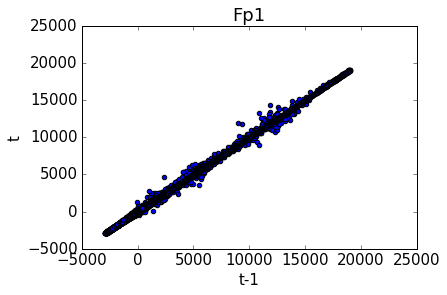

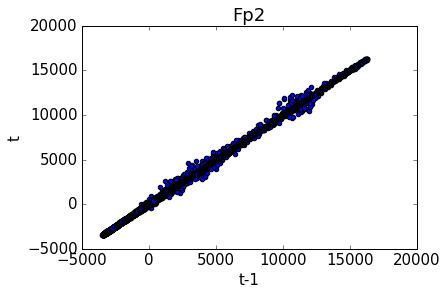

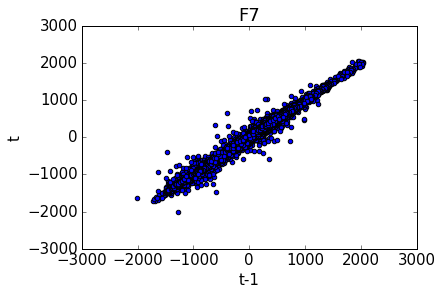

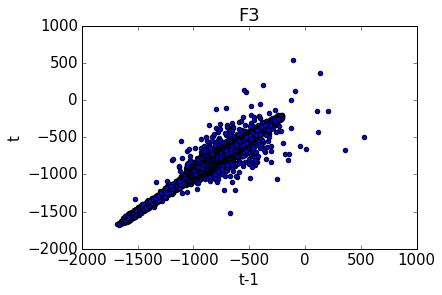

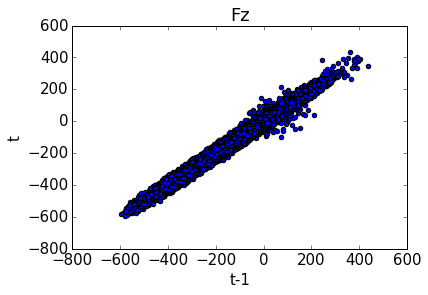

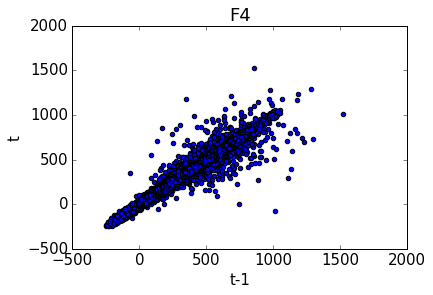

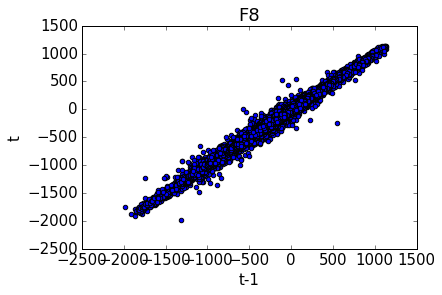

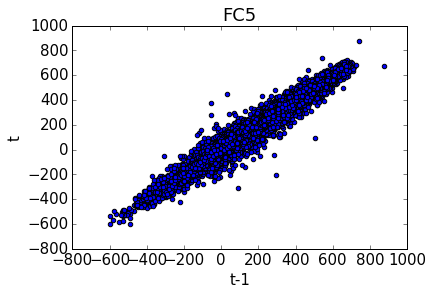

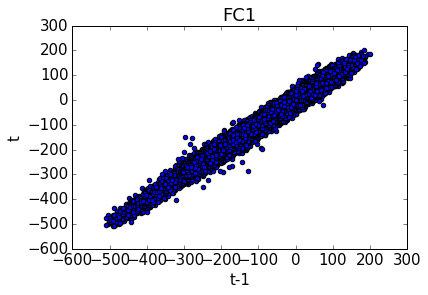

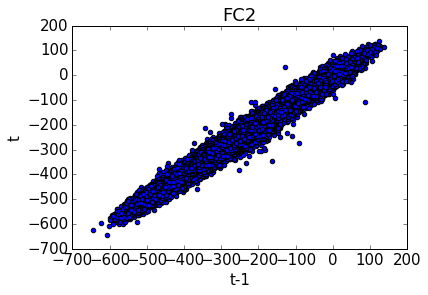

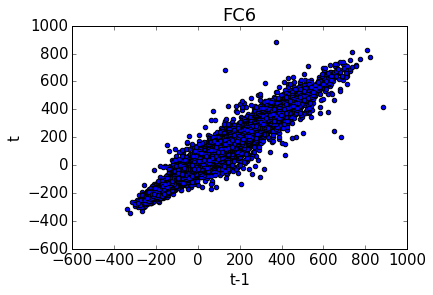

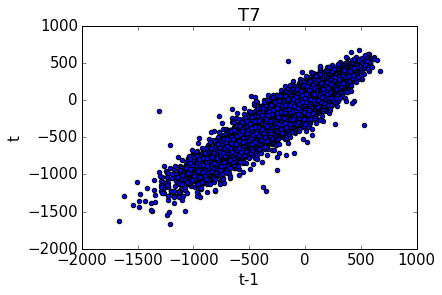

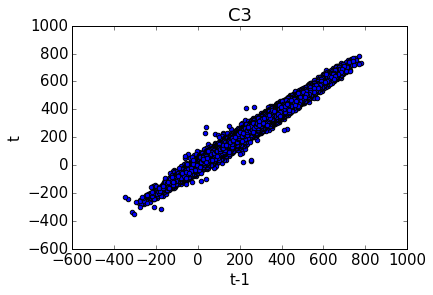

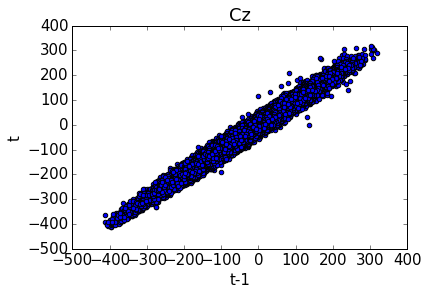

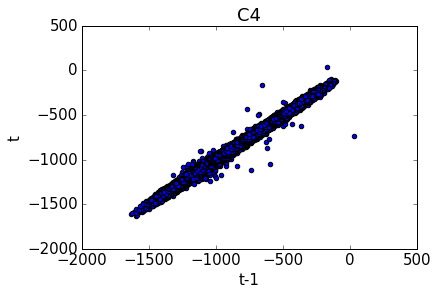

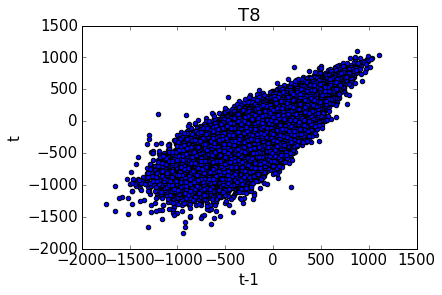

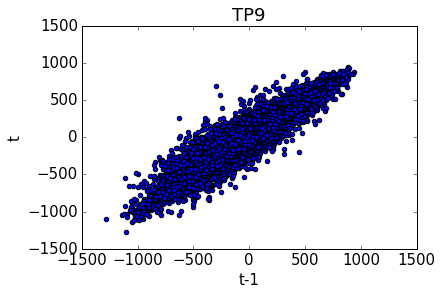

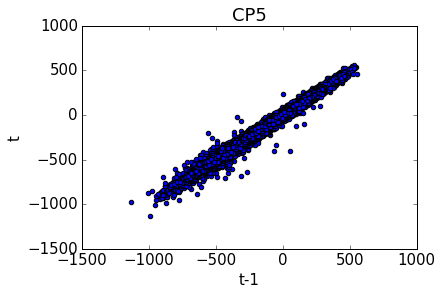

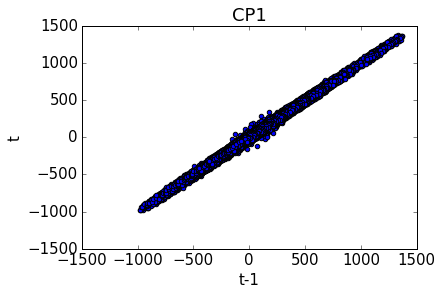

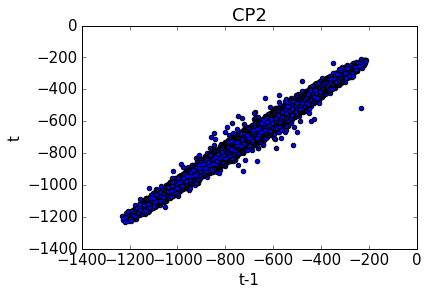

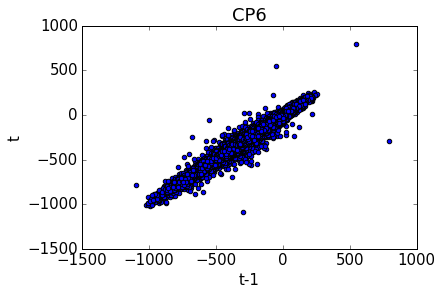

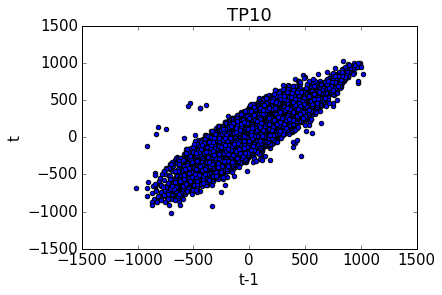

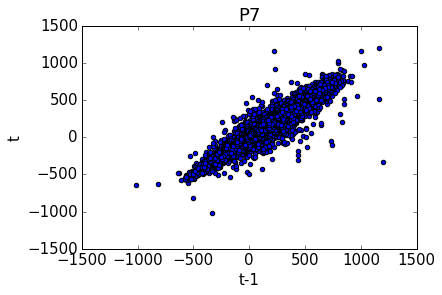

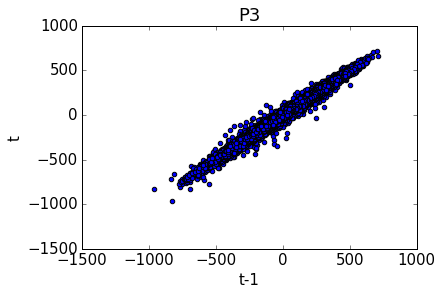

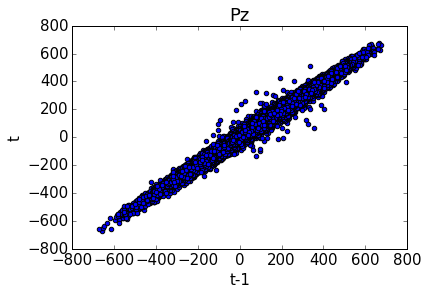

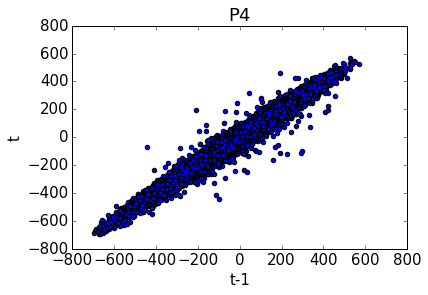

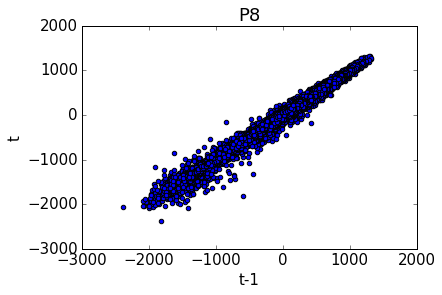

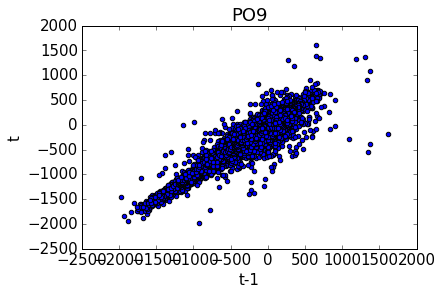

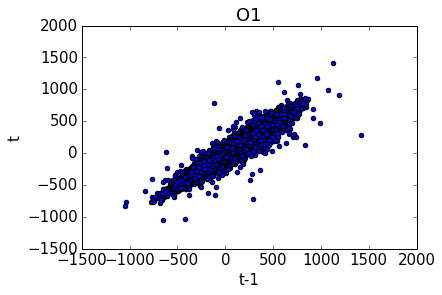

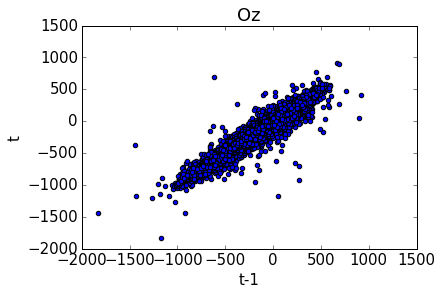

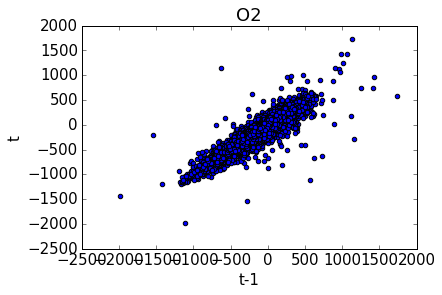

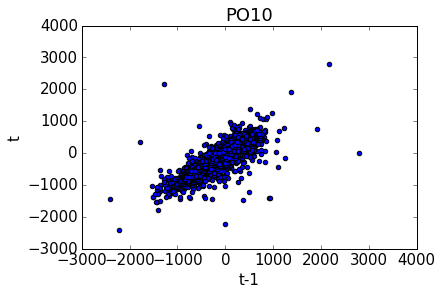

In [10]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [11]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.999303185912
0.999380763944
0.995359658863
0.986595787756
0.992637359053
0.988907182677
0.997183964079
0.983011274499
0.988395715174
0.986939231461
0.975539596358
0.96044985429
0.991278877471
0.986904778913
0.997125190805
0.831505302159
0.95699198229
0.993513393648
0.997974726366
0.990556698285
0.985629643671
0.940732466311
0.978837683948
0.992098813757
0.992123104723
0.987788699259
0.994355719979
0.98295535136
0.975450768621
0.976240044134
0.961356446692
0.96476843618


In [12]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.93246144  0.35257528  0.34394887  0.30670064  0.18082935
 -0.04214384  0.05386223 -0.07945235  0.09665709  0.26621336 -0.16248342
 -0.14146297  0.05722661  0.00398084 -0.02073684 -0.09015621 -0.2510794
 -0.07236897 -0.05548536  0.03055212 -0.24307185 -0.09715583 -0.08069237
 -0.10271732 -0.03149645 -0.29961429  0.17120394 -0.07655764 -0.11677093
 -0.05276686 -0.08014444]
[ 0.93246144  1.          0.37513356  0.37671577  0.31657509  0.13699396
  0.17086928  0.05039165 -0.06268472  0.20247297  0.32963749 -0.13380866
 -0.14081216  0.00295859  0.0567493   0.04243813 -0.00251572 -0.28378248
 -0.10724011 -0.02888111  0.14363027 -0.22660909 -0.07728681  0.01479566
 -0.18727041  0.02080221 -0.32454066  0.26333413 -0.05497312 -0.06403846
 -0.01855242  0.01580074]
[ 0.35257528  0.37513356  1.          0.62543261  0.34259398  0.06467971
  0.37156648  0.58871319  0.50982921  0.22250478  0.09803486  0.46940934
  0.25991673 -0.04453255  0.49247427  0.14090306  0.28729118  0.22044455


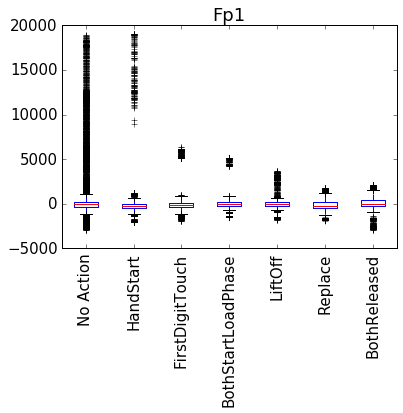

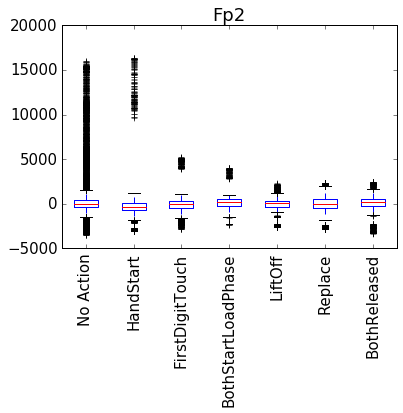

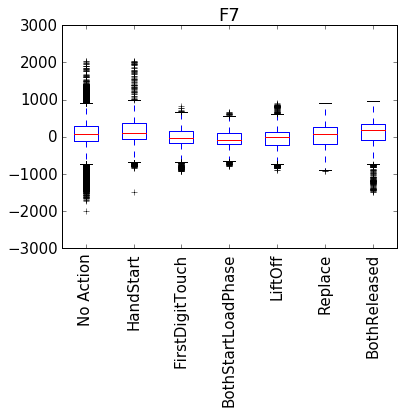

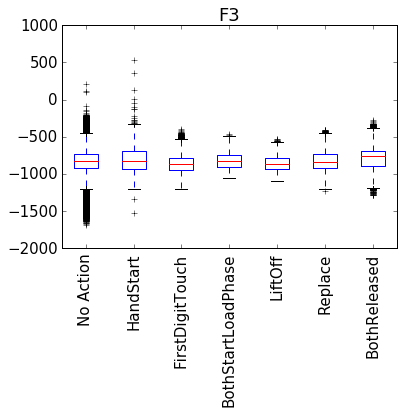

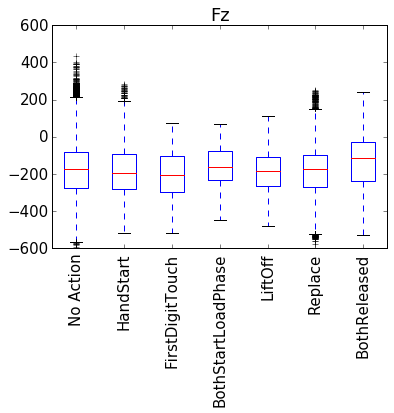

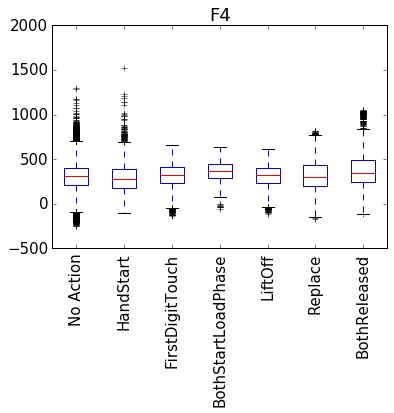

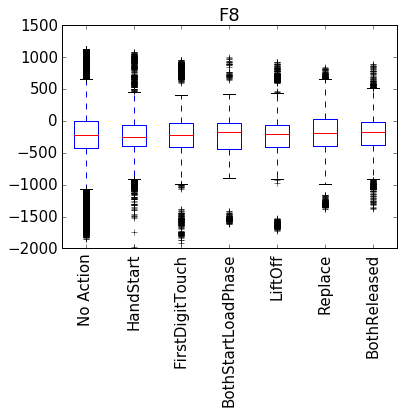

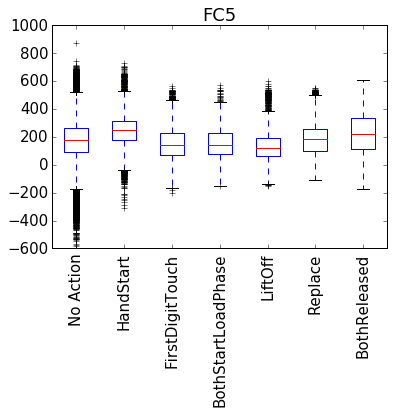

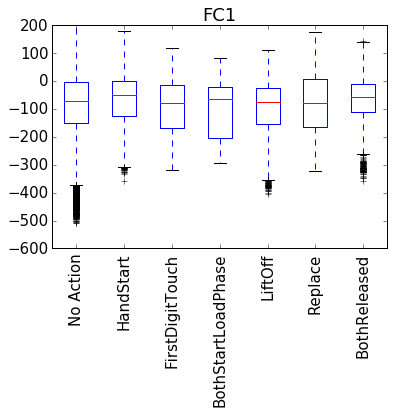

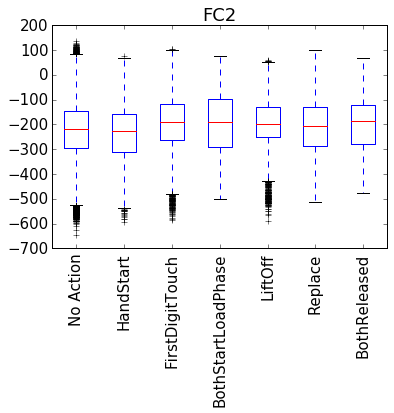

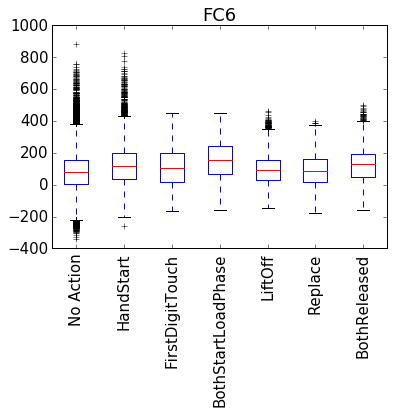

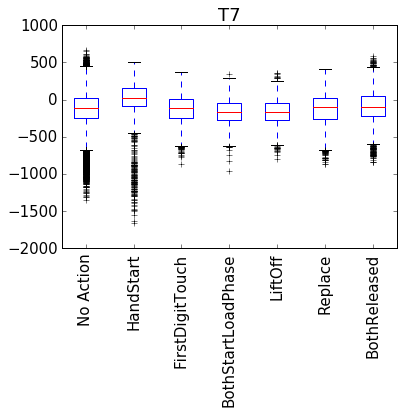

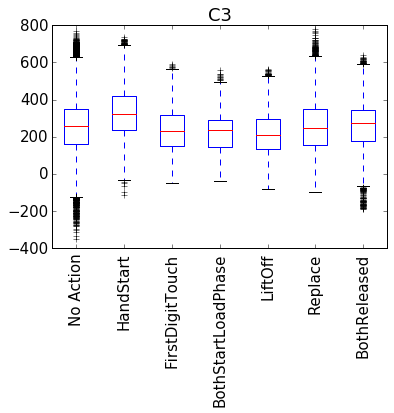

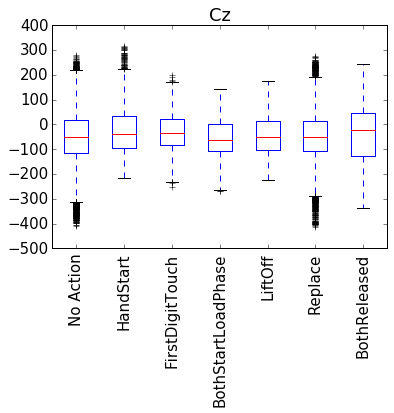

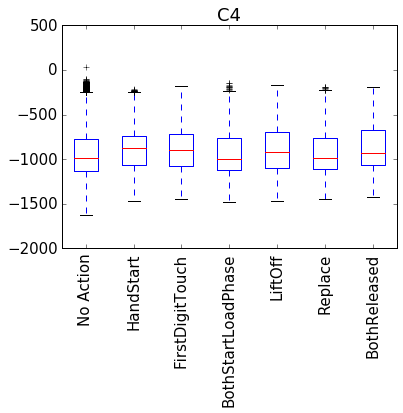

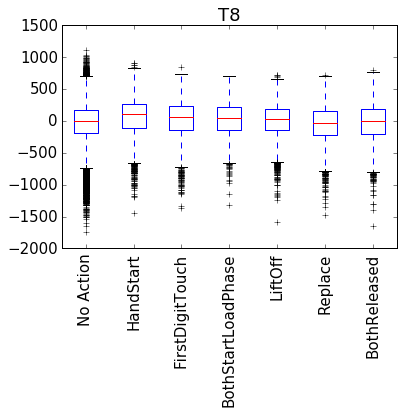

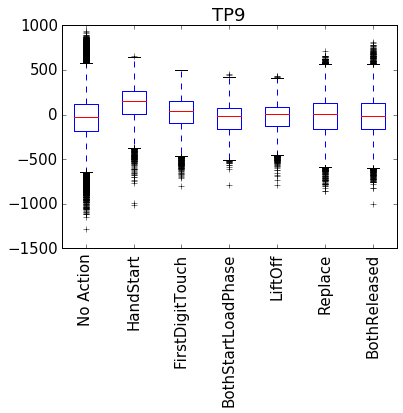

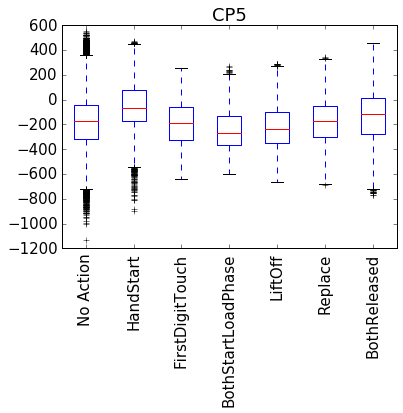

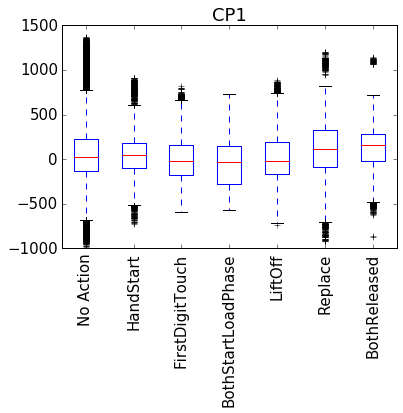

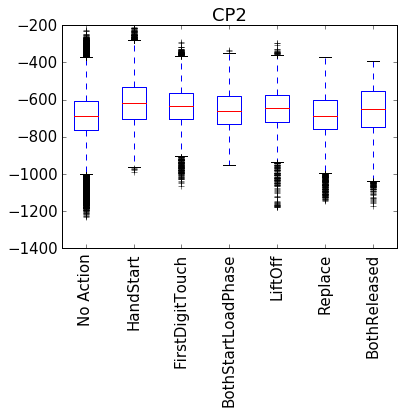

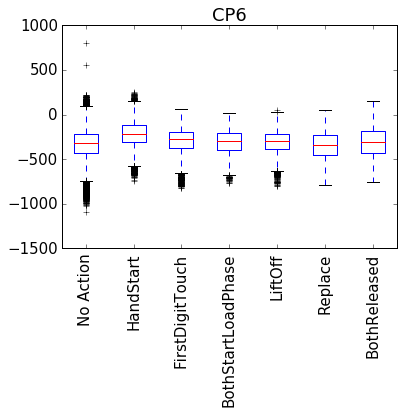

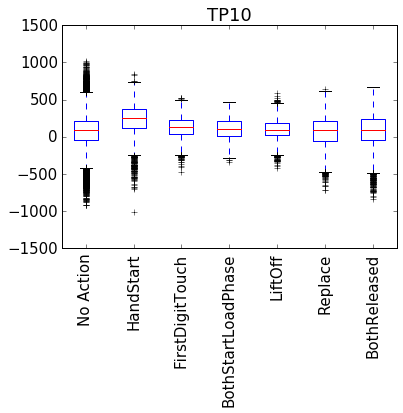

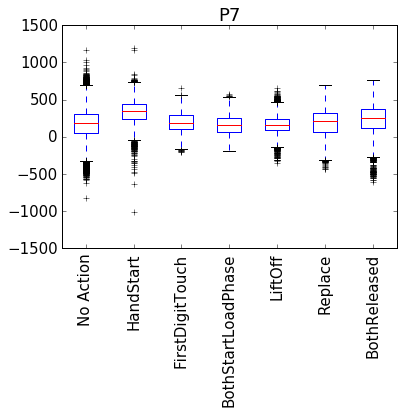

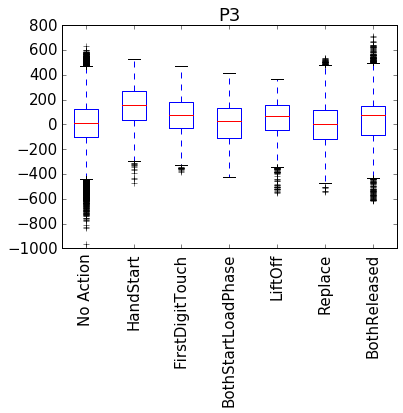

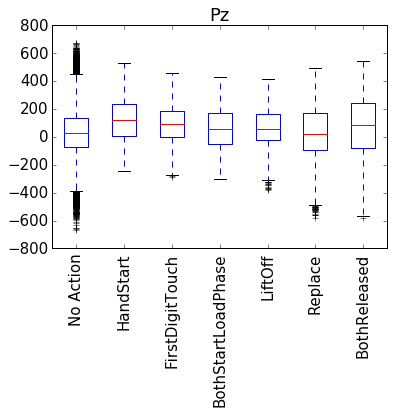

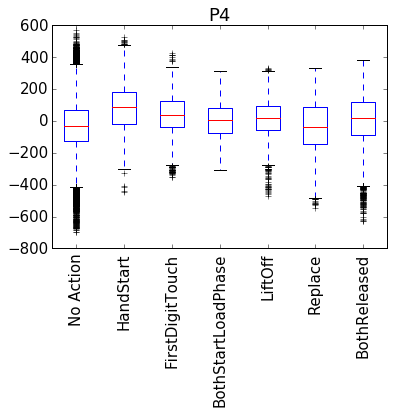

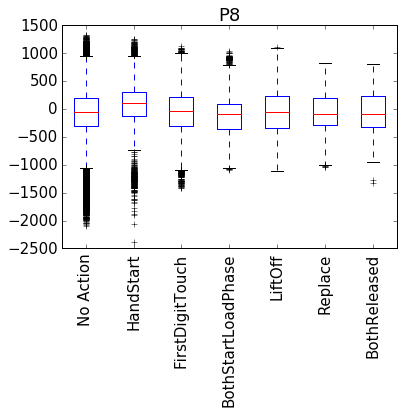

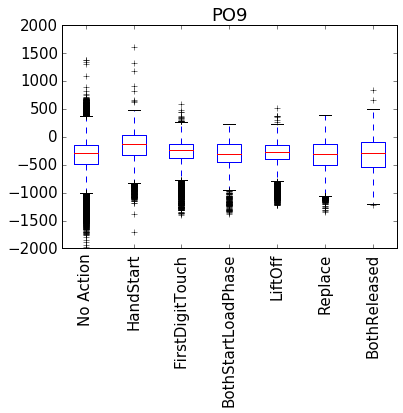

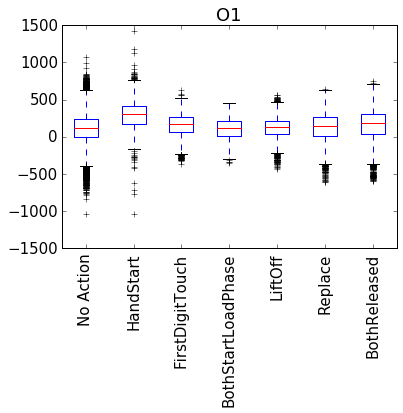

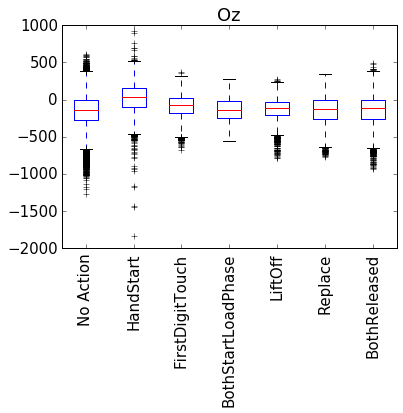

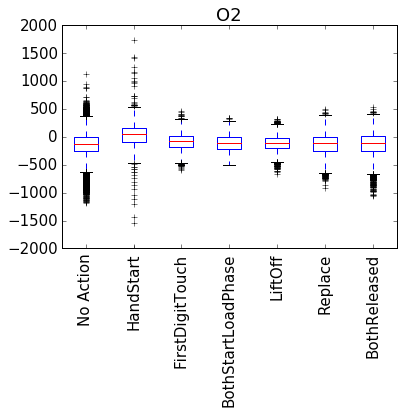

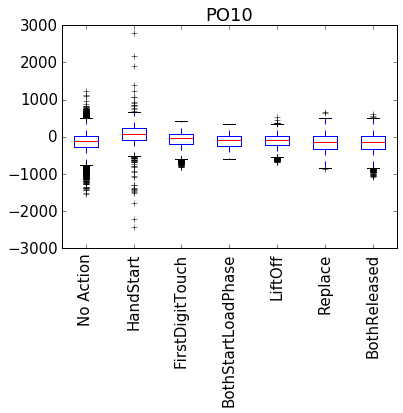

In [13]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [14]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[ 0.85837115,  0.02131123,  0.06007301, ...,  0.01627714,
         0.01906308,  0.01404811],
       [ 0.85191644,  0.01777597,  0.06482502, ...,  0.01576543,
         0.02899056,  0.00974043],
       [ 0.84316894,  0.02968419,  0.07088722, ...,  0.02005039,
         0.0166354 ,  0.00462738],
       ..., 
       [ 0.72866134,  0.17407208,  0.01750315, ...,  0.0194361 ,
         0.02588414,  0.02216943],
       [ 0.57336808,  0.3293706 ,  0.01704097, ...,  0.0147397 ,
         0.03340737,  0.02038633],
       [ 0.67832988,  0.22671354,  0.01651161, ...,  0.02922108,
         0.01458615,  0.01053591]])

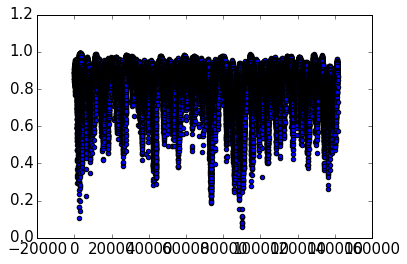

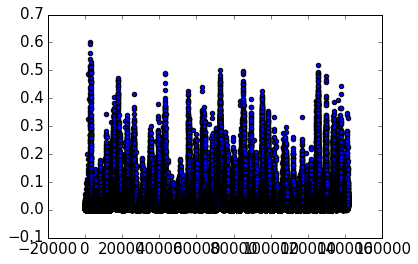

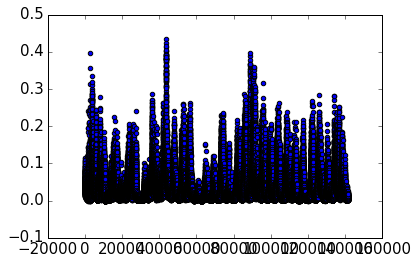

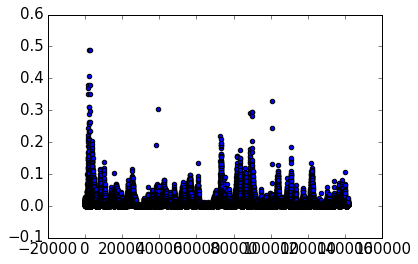

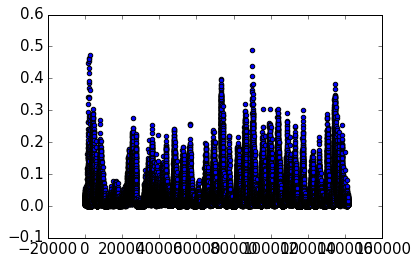

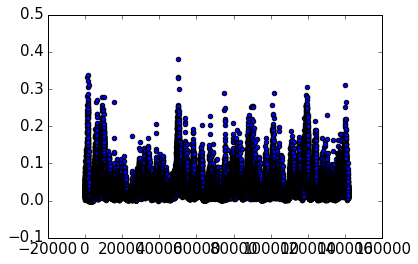

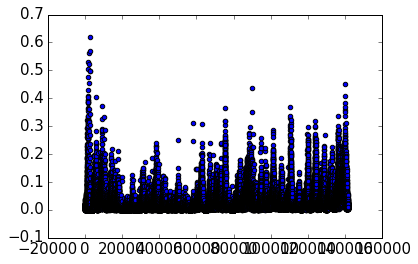

In [16]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [18]:
from sklearn.metrics import roc_auc_score 

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.660892835886
HandStart: 0.841424570371
FirstDigitTouch: 0.783255868358
BothStartLoadPhase: 0.822362474198
LiftOff: 0.818870801153
Replace: 0.713166302919
BothReleased: 0.791201167179


In [19]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

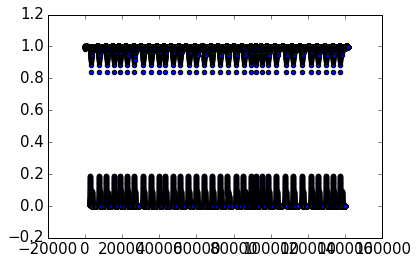

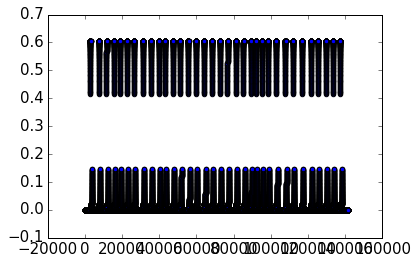

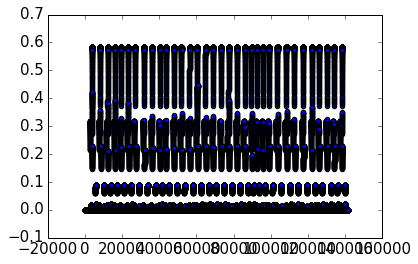

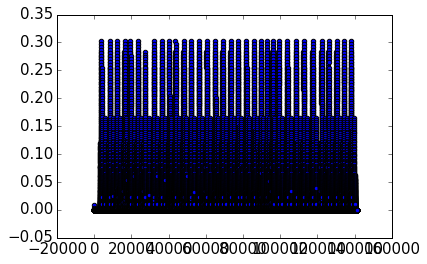

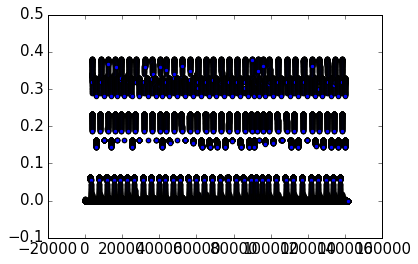

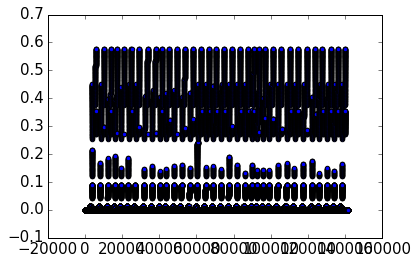

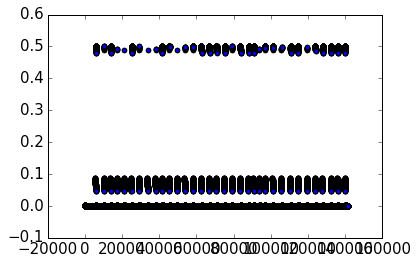

In [20]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [21]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.997331218945
HandStart: 0.995777547937
FirstDigitTouch: 0.998133541197
BothStartLoadPhase: 0.981466178232
LiftOff: 0.998081915708
Replace: 0.996097182561
BothReleased: 0.998873876151


In [22]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.999', '0.993', '0.890', '1.000', '0.828', '0.698', '0.989']
Recall: ['0.999', '0.993', '0.993', '0.058', '0.513', '0.993', '0.989']
F-1 Score: ['0.999', '0.993', '0.939', '0.110', '0.633', '0.820', '0.989']
